In [1]:
# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns
# EDA packages
import pandas as pd


In [2]:
#load text cleaning package\n",
import neattext as nfx

In [3]:
import warnings

In [4]:
#load data
df = pd.read_csv("C:\\Users\\matif\\Downloads\\covid19_tweets.csv")

In [5]:
df.dropna(inplace=True)

In [6]:
#df.isnull().sum()

In [7]:
df=df.apply(lambda x: x.astype(str).str.lower()) # the whole dataset is converted into lowercase()

In [8]:
#dir(nfx)

In [9]:
def get_clean_data_column (new_column_name , column_name ):
    df[new_column_name] = df[column_name].apply(nfx.remove_emojis)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_punctuations)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_special_characters)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_multiple_spaces)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_stopwords)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_urls)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_visacard_addr)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_terms_in_bracket)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_street_address)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_puncts)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_postoffice_box)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_phone_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_html_tags)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_currency_symbols)
    return df[new_column_name]

In [10]:
dict_names = {'cleaning_user_name':'user_name',
              'cleaning_user_location':'user_location',
              'cleaning_user_description':'user_description',
              'cleaning_text':'text',
              'cleaning_hashtags':'hashtags',
              'cleaning_source':'source'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    result = get_clean_data_column(i,j)

In [11]:
df[['user_name','cleaning_user_name']].head(2)

,user_name,cleaning_user_name
2,time4fisticuffs,timefisticuffs
3,ethel mertz,ethel mertz


In [12]:
#df[['user_location','cleaning_user_location']].head(2)

In [13]:
#df[['user_description','cleaning_user_description']].head(2) 

In [14]:
#df[['text','cleaning_text']].head(2) 

In [15]:
#df[['hashtags','cleaning_hashtags']].head(2) 

In [16]:
#df[['source','cleaning_source']].head(2) 

In [17]:
import datetime

In [18]:
def get_time_date(column_name,
                  new_column_name_year,
                  new_column_name_month,
                  new_column_name_day,
                  new_column_name_hour,
                  new_column_name_minute,
                  new_column_name_second):
    
    #it is in object type to convert into datetime 
    df[column_name] = pd.to_datetime(df[column_name])
    df[new_column_name_year]=df[column_name].dt.year
    df[new_column_name_month]=df[column_name].dt.month
    df[new_column_name_day]=df[column_name].dt.day
    df[new_column_name_hour]=df[column_name].dt.hour
    df[new_column_name_minute]=df[column_name].dt.minute
    df[new_column_name_second]=df[column_name].dt.second

In [19]:
get_time_date(column_name = 'user_created',
              new_column_name_year = 'years',
              new_column_name_month = 'months',
              new_column_name_day = 'days',
              new_column_name_hour='hours',
              new_column_name_minute='minutes',
              new_column_name_second='seconds')

In [20]:
'''here i import a package called textblob
    TextBlob is a Python (2 and 3) library for processing textual data.
    It provides a simple API for diving into common natural language processing (NLP) tasks such as
    1)part-of-speech tagging,
    2)noun phrase extraction,
    3)sentiment analysis,
    4)classification,
    5)translation, and more.'''

from textblob import TextBlob

In [21]:
def get_sentiment(column_id):
    blob = TextBlob(column_id)
    '''Sentiment Analysis is the process of assessing data and categorizing
    it according to the needs.'''
    
    '''The polarity and subjectivity of a statement are returned by TextBlob.
    The range of polarity is [-1,1],
    with -1 indicating a negative sentiment and 1 indicating a positive sentiment.'''
    
    sentiment_polarity = blob.sentiment.polarity
    
    '''subjectivity falls under the numeric range of [0,1]. 
    The degree of personal opinion and factual information in a text is measured by subjectivity.
    Because of the text’s heightened subjectivity,
    it contains personal opinion rather than factual information.'''
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0 :
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Natural'
    result = {'Polarity':sentiment_polarity,
            'Subjectivity':sentiment_subjectivity,
            'Sentiment':sentiment_label}
    return result

In [22]:
exl = df['cleaning_text'].iloc[0]

In [23]:
get_sentiment(exl)

{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentiment': 'Natural'}

In [24]:
def get_sentiment_results(column_mark):
    df['sentiment_results'] = df[column_mark].apply(get_sentiment)
    return df['sentiment_results']

In [25]:
get_sentiment_results('cleaning_text')

2         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
3         {'Polarity': 0.0, 'Subjectivity': 0.3571428571...
4         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
5         {'Polarity': -0.6999999999999998, 'Subjectivit...
6         {'Polarity': 0.05000000000000002, 'Subjectivit...
                                ...                        
179101    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
179102    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
179103    {'Polarity': 0.2, 'Subjectivity': 0.2, 'Sentim...
179104    {'Polarity': 0.8, 'Subjectivity': 0.7, 'Sentim...
179106    {'Polarity': 0.14488636363636365, 'Subjectivit...
Name: sentiment_results, Length: 99138, dtype: object

In [26]:
'''json_normalize: Normalize semi-structured JSON data into a flat table. Unserialized JSON objects.'''
from pandas.io.json import json_normalize

In [27]:
def get_json_normalize(normalize_colunm_name):
    result = pd.json_normalize(df[normalize_colunm_name])
    return result

In [28]:
get_json_normalize('sentiment_results')

,Polarity,Subjectivity,Sentiment
0,0.000000,0.000000,Natural
1,0.000000,0.357143,Natural
2,0.000000,0.000000,Natural
3,-0.700000,0.666667,Negative
4,0.050000,0.500000,Positive
...,...,...,...
99133,0.000000,0.000000,Natural
99134,0.000000,0.000000,Natural
99135,0.200000,0.200000,Positive
99136,0.800000,0.700000,Positive


In [29]:
#to join the columns of sentiment_result to dataset we use this
df = df.join(pd.json_normalize(df['sentiment_results']))

In [30]:
#here I made a function to get positive , negative and nutral tweets 
def get_pnn_tweet(name_of_pnn):
    pnn_tweet = df[df['Sentiment']==name_of_pnn]['cleaning_text']
    return pnn_tweet

In [31]:
#positive_tweet.head()
pos_tweet = get_pnn_tweet('Positive')

In [32]:
pos_tweet

4        july media bulletin novel coronavirusupdates c...
17       second wave covid flandersback homework httpst...
24                   holy water times covid httpstcoyazyxl
26       munitions response team bosniaandherzegovina m...
28       tncoronaupdatetn crosses lakh mark ppp recover...
                               ...                        
99098    meet kirsty shes looking ways engage older pop...
99100    nhs testandtrace fail government pays wages un...
99115    heartoftexas showing reject fearmongering chea...
99127    know strengthsfollow bizopportunitynowhttpstco...
99135    share thoughts new normal implications covid f...
Name: cleaning_text, Length: 18961, dtype: object

In [33]:
neg_tweet = get_pnn_tweet('Negative')
nat_tweet = get_pnn_tweet('Natural')

In [34]:
#here I made a function to get positive , negative and nutral tweets tokens 
def get_pnn_token(pnn_list_name):
    pnn_token = [token for line in pnn_list_name for token in line.split()]
    return pnn_token

In [35]:
positive = get_pnn_token(pos_tweet)

In [36]:
positive

['july',
 'media',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'covid',
 'kansalrohit',
 'drsyedsehrish',
 'airnewsalerts',
 'ani',
 'httpstcomneecsjhh',
 'second',
 'wave',
 'covid',
 'flandersback',
 'homework',
 'httpstcoswimzacmn',
 'holy',
 'water',
 'times',
 'covid',
 'httpstcoyazyxl',
 'munitions',
 'response',
 'team',
 'bosniaandherzegovina',
 'modified',
 'ops',
 'adopted',
 'masks',
 'disinfectants',
 'sanitizers',
 'httpstcolmbkxlwwq',
 'tncoronaupdatetn',
 'crosses',
 'lakh',
 'mark',
 'ppp',
 'recovered',
 'farcovid',
 'positive',
 'today',
 'total',
 'httpstcoqdjkpccqv',
 'unionwill',
 'megawedgy',
 'jjhorgan',
 'community',
 'outbreak',
 'covid',
 'haida',
 'gwaii',
 'cases',
 'recover',
 'httpstcorjzuyqy',
 'jfoster',
 'bbclaurak',
 'borisjohnson',
 'understood',
 'hadnt',
 'missed',
 'cobra',
 'meeting',
 'httpstcomqpagcygn',
 'britain',
 'didnt',
 'understand',
 'covid',
 'months',
 'plenty',
 'countries',
 'understand',
 'took',
 'effective',
 'httpstcokvcaqskz'

In [37]:
negative = get_pnn_token(neg_tweet)
natural = get_pnn_token(nat_tweet)

In [38]:
from collections import Counter

In [39]:
def get_frequence_of_token(tokens,nums=30):
    word_tokens = Counter(tokens)
    most_common = word_tokens.most_common(nums)
    most_common_info = dict (most_common)
    return most_common_info

In [40]:
# here i called function and store the value in variable 
positive_tweet_result = get_frequence_of_token(positive)

In [41]:
positive_tweet_result

{'covid': 15400,
 'cases': 2205,
 'coronavirus': 1560,
 'new': 1507,
 'amp': 1271,
 'pandemic': 865,
 'people': 819,
 'deaths': 804,
 'positive': 744,
 'health': 510,
 'total': 495,
 'today': 475,
 'india': 461,
 'day': 414,
 'like': 392,
 'reported': 390,
 'help': 388,
 'need': 385,
 'july': 378,
 'mask': 369,
 'dont': 365,
 'spread': 362,
 'testing': 347,
 'tested': 343,
 'realdonaldtrump': 329,
 'tests': 328,
 'news': 327,
 'number': 323,
 'trump': 312,
 'time': 312}

In [42]:
negative_tweet_result=get_frequence_of_token(negative)
natural_tweet_result = get_frequence_of_token(natural)

In [43]:
'''here i made a function with variable 
then function call another function of (get tokens)
then convert that into pandas data frame '''

def get_most_common_words(token_name):
    most_common_words = get_frequence_of_token(token_name)
    most_common_words_df = pd.DataFrame(most_common_words.items(),columns=['words','score'])
    return most_common_words_df

In [44]:
get_most_common_words(positive_tweet_result)

,words,score
0,covid,15400
1,cases,2205
2,coronavirus,1560
3,new,1507
4,amp,1271
5,pandemic,865
6,people,819
7,deaths,804
8,positive,744
9,health,510


In [45]:
#get_most_common_words(negative_tweet_result).head()
#get_most_common_words(natural_tweet_result).head()

In [46]:
new_df = df[[
            'cleaning_user_name',
            'cleaning_user_location',
            'cleaning_user_description',
            'cleaning_text', 
            'cleaning_hashtags',
            'cleaning_source',
            'years', 
            'months',
            'days',
            'hours',
            'minutes',
            'seconds',
            'Polarity',
            'Subjectivity',
            'Sentiment'
           ]]

In [47]:
new_df.head()

,cleaning_user_name,cleaning_user_location,cleaning_user_description,cleaning_text,cleaning_hashtags,cleaning_source,years,months,days,hours,minutes,seconds,Polarity,Subjectivity,Sentiment
2,timefisticuffs,pewee valley ky,christian catholic conservative reagan republi...,diane wdunlap realdonaldtrump trump claimed co...,covid,twitter android,2009,2,28,18,57,41,0.00,0.000000,Natural
3,ethel mertz,stuck middle,browns indians clevelandproud cavs resist,brookbanktv gift covid appreciation simple thi...,covid,twitter iphone,2019,3,7,1,45,6,-0.70,0.666667,Negative
4,diprjk,jammu kashmir,official twitter handle department information...,july media bulletin novel coronavirusupdates c...,coronavirusupdates covid,twitter android,2017,2,12,6,45,15,0.05,0.500000,Positive
5,franz schubert,,novorossiya stayathome polymath composer english,coronavirus covid deaths continue rise bad pol...,coronavirus covid,twitter web app,2018,3,19,16,29,52,0.00,0.000000,Natural
6,hr bartender,gainesville fl,workplace tips advice served friendly place co...,covid change work general recruiting specifica...,covid recruiting,buffer,2008,8,12,18,19,49,0.00,0.000000,Natural


In [48]:
def get_unique_value(column_id):
    #"These are unique value"
    unique_info = df[column_id].unique()
    return unique_info
def get_unique_info_count(column_id):
    #"This tells how many times a word is repeat or not"
    unique_info_count = df[column_id].value_counts()
    return  unique_info_count 
def get_unique_info_largest(column_id):
    #"Here top 30 values which repeated mostly")
    #plot the top value count 
    unique_info_largest = df[column_id].value_counts().nlargest(30)
    return unique_info_largest

In [49]:
columns_id_list=['user_name',
                 'user_location',
                 'user_description',
                 'user_created',
                 'user_followers',
                 'user_friends',
                 'user_favourites',
                 'user_verified', 
                 'date',
                 'text',
                 'hashtags',
                 'source',
                 'is_retweet']

for column_id_list in columns_id_list:
    if column_id_list == 'user_name':
        unique_value_user_name = get_unique_value('user_name')
        info_count_user_name=get_unique_info_count('user_name')
        info_largest_user_name=get_unique_info_largest('user_name')
    elif column_id_list == 'user_location':
        unique_value_user_location = get_unique_value('user_location')
        info_count_user_location = get_unique_info_count('user_location')
        info_largest_user_location = get_unique_info_largest('user_location')
    elif column_id_list == 'user_description':
        unique_value_user_description = get_unique_value('user_description')
        info_count_user_description = get_unique_info_count('user_description')
        info_largest_user_description = get_unique_info_largest('user_description')
    elif column_id_list == 'text':
        unique_value_text = get_unique_value('text')
        info_count_text = get_unique_info_count('text')
        info_largest_text = get_unique_info_largest('text')
    elif column_id_list == 'hashtags':
        unique_value_hashtags = get_unique_value('hashtags')
        info_count_hashtags = get_unique_info_count('hashtags')
        info_largest_hashtags = get_unique_info_largest('hashtags')
    elif column_id_list == 'source':
        unique_value_source = get_unique_value('source')
        info_count_source = get_unique_info_count('source')

In [50]:
unique_value_user_name

array(['time4fisticuffs', 'ethel mertz', 'dipr-j&k', ...,
       'new jersey herald', 'pris', 'ajimati abdulrahman o.'],
      dtype=object)

In [51]:
info_count_user_name

covidnews.ch                402
globalpandemic.net          320
blood donors india          282
hindustan times             267
ians tweets                 228
                           ... 
pokandi man 🚣‍♂️              1
elizabeth b. pathak, phd      1
aim internet                  1
kenton etherington            1
ajimati abdulrahman o.        1
Name: user_name, Length: 53098, dtype: int64

In [52]:
info_largest_user_name

covidnews.ch                402
globalpandemic.net          320
blood donors india          282
hindustan times             267
ians tweets                 228
otv                         212
covid scale                 191
sambad english              176
ani                         169
abs-cbn news                164
the new indian express      157
hotpage news                135
national cyber security     134
iam platform                129
abs-cbn news channel        125
8min 46sec                  123
deccan herald               122
newsmobile                  118
suke                        116
global times                112
news9                       111
grey cross studios           99
china xinhua news            94
nazaket rather               92
new straits times            91
all india radio news         91
business standard            91
activistbowen                90
kalinga tv                   90
journalist siraj noorani     89
Name: user_name, dtype: int64

In [53]:
#unique_value_user_location
#info_count_user_location
#info_largest_user_location
#unique_value_user_description
#info_count_user_description
#info_largest_user_description
#unique_value_text
#info_count_text
#info_largest_text
#unique_value_hashtags
#info_count_hashtags
#info_largest_hashtags
#unique_value_source
#info_count_source
#info_largest_source

In [54]:
'''here i made a function to take all columns than remove
stopwords from that further convert them into list'''
def get_clean_list (new_column_name):
    clean_list = df[new_column_name].apply(nfx.remove_stopwords).tolist()
    return clean_list

In [55]:
#this is list in which each column is mentioned 
columns_list = ['cleaning_user_name',
                'cleaning_user_location',
                'cleaning_user_description',
                'cleaning_text',
                'cleaning_hashtags',
                'cleaning_source']

# this is the for loop in columns_list

for column_list in columns_list:

    # here i give some conditions for each columns 
    if column_list == 'cleaning_user_name':
        # here i call function get_clean_list in different variables
        clean_user_name_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_user_location':
        clean_user_loaction_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_user_description':
        clean_user_description_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_text':
        clean_text_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_hashtags':
        clean_hashtags_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_source':
        clean_source_result1 = get_clean_list(column_list)

In [56]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,years,months,days,hours,minutes,seconds,sentiment_results,Polarity,Subjectivity,Sentiment
2,time4fisticuffs,"pewee valley, ky",#christian #catholic #conservative #reagan #re...,2009-02-28 18:57:41,9275,9525,7254,false,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,...,2009,2,28,18,57,41,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.00,0.000000,Natural
3,ethel mertz,stuck in the middle,#browns #indians #clevelandproud #[]_[] #cavs ...,2019-03-07 01:45:06,197,987,1488,false,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,...,2019,3,7,1,45,6,"{'Polarity': 0.0, 'Subjectivity': 0.3571428571...",-0.70,0.666667,Negative
4,dipr-j&k,jammu and kashmir,🖊️official twitter handle of department of inf...,2017-02-12 06:45:15,101009,168,101,false,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,...,2017,2,12,6,45,15,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.05,0.500000,Positive
5,🎹 franz schubert,новоро́ссия,🎼 #новоро́ссия #novorossiya #оставайсядома #s...,2018-03-19 16:29:52,1180,1071,1287,false,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,...,2018,3,19,16,29,52,"{'Polarity': -0.6999999999999998, 'Subjectivit...",0.00,0.000000,Natural
6,hr bartender,"gainesville, fl",workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,false,2020-07-25 12:27:03,how #covid19 will change work in general (and ...,...,2008,8,12,18,19,49,"{'Polarity': 0.05000000000000002, 'Subjectivit...",0.00,0.000000,Natural


In [57]:
'''here i made a function to take all columns than remove
stopwords from that further convert them into list'''
def get_clean_list (new_column_name):
    clean_list = df[new_column_name].apply(nfx.remove_stopwords).tolist()
    return clean_list

In [58]:
# this is list in which each column is mentioned 

columns_list = ['cleaning_user_name',
                'cleaning_user_location',
                'cleaning_user_description',
                'cleaning_text',
                'cleaning_hashtags',
                'cleaning_source']

# this is the for loop in columns_list

for column_list in columns_list:

    # here i give some conditions for each columns 
    if column_list == 'cleaning_user_name':
        # here i call function get_clean_list in different variables
        clean_user_name_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_user_location':
        clean_user_loaction_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_user_description':
        clean_user_description_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_text':
        clean_text_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_hashtags':
        clean_hashtags_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_source':
        clean_source_result1 = get_clean_list(column_list)

In [59]:
clean_user_name_result1

['timefisticuffs',
 'ethel mertz',
 'diprjk',
 'franz schubert',
 'hr bartender',
 'member christ',
 'creativegms',
 'sexxylypps',
 'africa youth advisory board drr',
 'dimapur',
 'marc goovaerts',
 'cawst',
 'florian bieber',
 'blood donors india',
 'tetra tech international development',
 'beatnikgeek soothsayer',
 'mugilan chandrakumar',
 'vcinemas',
 'beautify data',
 'alan taylor',
 'harleyb',
 'mr gazz',
 'ashp',
 'aishling sheridan',
 'matthew mcgee',
 'n c ta h',
 'toi delhi',
 'dr k surender raj',
 'barry grodenchik',
 'carlino',
 '',
 'jazmine',
 'charles mapundu',
 'stephen williams',
 'bestvaluebuttons',
 'whitey',
 'investmentguruindia',
 'st jude india childcare centres',
 'imf',
 'john dalton',
 'dr john stanton climateemergency scotlandxr',
 'cholderton farm shop',
 'sales business coach rakesh sharma',
 'new straits times',
 'national herald',
 'max',
 'senator g craughwell',
 'umadlamini',
 'romeo',
 'tncoronaupdates',
 'gaa',
 'rumpusguy',
 'videochinatv',
 'kollywoo

In [60]:
#clean_user_loaction_result1
#clean_user_description_result1
#clean_text_result1
#clean_hashtags_result1
#clean_source_result1

In [61]:
#here i made a function for tokenazation in which each sentence is going to broken into single word
def get_token (function_name):
    tokens = [token for line in function_name for token in line.split()]
    return tokens

In [62]:
get_token_user_name_result2 = get_token(clean_user_name_result1)

In [63]:
get_token_user_name_result2

['timefisticuffs',
 'ethel',
 'mertz',
 'diprjk',
 'franz',
 'schubert',
 'hr',
 'bartender',
 'member',
 'christ',
 'creativegms',
 'sexxylypps',
 'africa',
 'youth',
 'advisory',
 'board',
 'drr',
 'dimapur',
 'marc',
 'goovaerts',
 'cawst',
 'florian',
 'bieber',
 'blood',
 'donors',
 'india',
 'tetra',
 'tech',
 'international',
 'development',
 'beatnikgeek',
 'soothsayer',
 'mugilan',
 'chandrakumar',
 'vcinemas',
 'beautify',
 'data',
 'alan',
 'taylor',
 'harleyb',
 'mr',
 'gazz',
 'ashp',
 'aishling',
 'sheridan',
 'matthew',
 'mcgee',
 'n',
 'c',
 'ta',
 'h',
 'toi',
 'delhi',
 'dr',
 'k',
 'surender',
 'raj',
 'barry',
 'grodenchik',
 'carlino',
 'jazmine',
 'charles',
 'mapundu',
 'stephen',
 'williams',
 'bestvaluebuttons',
 'whitey',
 'investmentguruindia',
 'st',
 'jude',
 'india',
 'childcare',
 'centres',
 'imf',
 'john',
 'dalton',
 'dr',
 'john',
 'stanton',
 'climateemergency',
 'scotlandxr',
 'cholderton',
 'farm',
 'shop',
 'sales',
 'business',
 'coach',
 'rakesh

In [64]:
get_token_user_loaction_result2 = get_token(clean_user_loaction_result1)
#get_token_user_loaction_result2
get_token_user_description_result2 = get_token(clean_user_description_result1)
#get_token_user_description_result2
get_token_text_result2 = get_token(clean_text_result1)
#get_token_text_result2
get_token_hashtags_result2 = get_token(clean_hashtags_result1)
#get_token_hashtags_result2
get_token_source_result2 = get_token(clean_source_result1)
#get_token_source_result2

In [65]:
#the get_frequence_of_token function is defined above
user_name_tokens_result_2 = get_frequence_of_token(clean_user_name_result1)

In [66]:
user_name_tokens_result_2

{'': 1317,
 'covidnewsch': 402,
 'globalpandemicnet': 320,
 'blood donors india': 282,
 'hindustan times': 267,
 'ians tweets': 228,
 'otv': 212,
 'covid scale': 191,
 'news': 188,
 'sambad english': 176,
 'ani': 169,
 'abscbn news': 164,
 'new indian express': 157,
 'hotpage news': 135,
 'national cyber security': 134,
 'iam platform': 129,
 'abscbn news channel': 125,
 'min sec': 123,
 'deccan herald': 122,
 'newsmobile': 118,
 'suke': 116,
 'global times': 112,
 'grey cross studios': 99,
 'china xinhua news': 94,
 'business standard': 92,
 'nazaket': 92,
 'new straits times': 91,
 'india radio news': 91,
 'kalinga tv': 90,
 'activistbowen': 90}

In [67]:
user_loaction_tokens_result_2 = get_frequence_of_token(clean_user_loaction_result1)
#user_loaction_tokens_result_2
user_description_tokens_result_2 = get_frequence_of_token(clean_user_description_result1)
#user_description_tokens_result_2
text_tokens_result_2=get_frequence_of_token(clean_text_result1)
#text_tokens_result_2
hashtags_tokens_result_2 = get_frequence_of_token(clean_hashtags_result1) 
#hashtags_tokens_result_2
source_tokens_result_2 = get_frequence_of_token(clean_source_result1)
#source_tokens_result_2

In [68]:
#the get_most_common_words function is defined above 
m_c_w_u_result3 = get_most_common_words(user_name_tokens_result_2)

In [69]:
m_c_w_u_result3

,words,score
0,,1317
1,covidnewsch,402
2,globalpandemicnet,320
3,blood donors india,282
4,hindustan times,267
5,ians tweets,228
6,otv,212
7,covid scale,191
8,news,188
9,sambad english,176


In [70]:
m_c_w_l_result3 = get_most_common_words(user_loaction_tokens_result_2)
#m_c_w_l_result3
m_c_w_d_result3 = get_most_common_words(user_description_tokens_result_2)
#m_c_w_d_result3
m_c_w_t_result3=get_most_common_words(text_tokens_result_2)
#m_c_w_t_result3
m_c_w_h_result3 = get_most_common_words(hashtags_tokens_result_2)
#m_c_w_h_result3
m_c_w_s_result3= get_most_common_words(source_tokens_result_2)
#m_c_w_s_result3

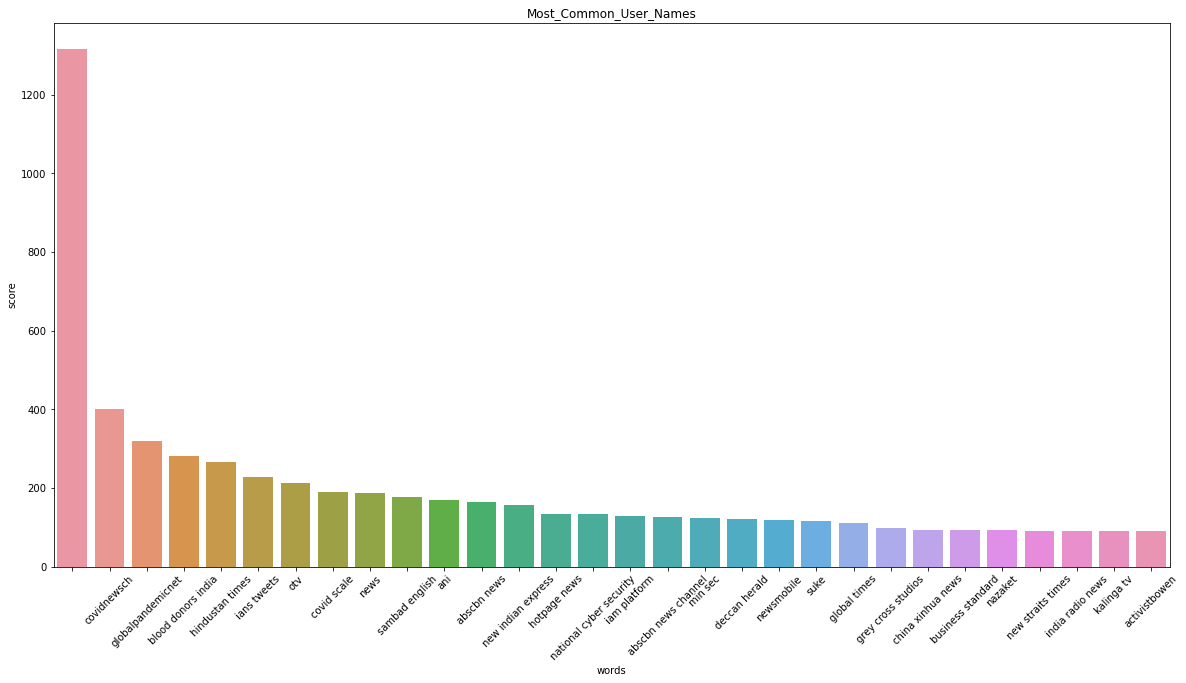

In [71]:
plt.figure(figsize=(20,10))
#by this i can analysis all most common words 
sns.barplot( x = 'words', y = 'score', data=m_c_w_u_result3)
plt.xticks(rotation =45)
plt.title("Most_Common_User_Names")
plt.show()

In [72]:
#pip install wordcloud
from wordcloud import WordCloud

In [73]:
def plot_wordcloud(tokens):
    my_wordcloud = WordCloud().generate(tokens)
    plt.imshow(my_wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [74]:
def get_token_name (token_result):
    token_name = ' '.join(token_result)
    return token_name

In [75]:
tokens_list=['clean_source_token_result2',
             'clean_hashtags_token_result2',
             'clean_text_token_result2',
             'clean_user_description_token_result2',
             'clean_user_location_token_result2',
             'clean_user_token_result2']
for token_list in tokens_list:
    
    if token_list == 'clean_user_token_result2':
        clean_user_wordcloud = get_token_name(user_name_tokens_result_2)
    elif token_list == 'clean_user_location_token_result2':
        clean_user_location_wordcloud = get_token_name(user_loaction_tokens_result_2)
    elif token_list == 'clean_user_description_token_result2':
        clean_user_description_wordcloud = get_token_name(user_description_tokens_result_2)
    elif token_list == 'clean_text_token_result2':
        clean_text_wordcloud = get_token_name(text_tokens_result_2)
    elif token_list == 'clean_hashtags_token_result2':
        clean_hashtags_wordcloud = get_token_name(hashtags_tokens_result_2)   
    elif token_list == 'clean_source_token_result2':
        clean_source_wordcloud = get_token_name(source_tokens_result_2)

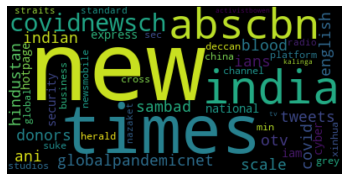

In [76]:
plot_wordcloud(clean_user_wordcloud)

In [77]:
#plot_wordcloud(clean_user_location_wordcloud)
#plot_wordcloud(clean_user_description_wordcloud)
#plot_wordcloud(clean_text_wordcloud)
#plot_wordcloud(clean_hashtags_wordcloud)
#plot_wordcloud(clean_source_wordcloud)

In [83]:
import nltk

In [84]:
from nltk.stem import WordNetLemmatizer

In [85]:
lemmatizer = WordNetLemmatizer()
def get_lemmatization(input_str_name):
    input_str =input_str_name 
    for i in input_str:
        a = nltk.word_tokenize(i)
        for word in a:
            print(lemmatizer.lemmatize(word))

In [86]:
get_lemmatization(get_token_user_name_result2)

timefisticuffs
ethel
mertz
diprjk
franz
schubert
hr
bartender
member
christ
creativegms
sexxylypps
africa
youth
advisory
board
drr
dimapur
marc
goovaerts
cawst
florian
bieber
blood
donor
india
tetra
tech
international
development
beatnikgeek
soothsayer
mugilan
chandrakumar
vcinemas
beautify
data
alan
taylor
harleyb
mr
gazz
ashp
aishling
sheridan
matthew
mcgee
n
c
ta
h
toi
delhi
dr
k
surender
raj
barry
grodenchik
carlino
jazmine
charles
mapundu
stephen
williams
bestvaluebuttons
whitey
investmentguruindia
st
jude
india
childcare
centre
imf
john
dalton
dr
john
stanton
climateemergency
scotlandxr
cholderton
farm
shop
sale
business
coach
rakesh
sharma
new
strait
time
national
herald
max
senator
g
craughwell
umadlamini
romeo
tncoronaupdates
gaa
rumpusguy
videochinatv
kollywood
arena
habitat
humanity
texas
thomas
faires
adventuresbydad
dr
miguel
escalon
franz
schubert
public
health
economy
michelle
dunning
jasmine
livemint
gary
keywood
ceo
salford
cv
iam
platform
jessica
roland
leicestershire

white
straight
male
angela
chaudhari
md
dr
rob
whitehurst
cine
peek
sanjay
rastogi
jf
claude
msm
covid
number
nawcad
henshaws
patient
safety
learning
gedwardmcauley
timothy
utteridge
louise
pascale
national
cyber
security
rollen
quail
farm
jf
claude
msm
nathanos
ichata
movieupdates
ivabadunu
pankaj
arora
biharsehai
rejoice
peter
muyombano
tncoronaupdates
shashank
kumar
duggal
dominiquenotwilkins
moneycontrol
e
io
akinniyi
prpropam
pam
purifoy
gisele
guenard
new
indian
express
uneekdose
andrew
morgan
olummy
sarah
birken
dr
tara
quinncirillo
irishma
sheree
minuteconsult
josh
cef
v
pascual
civicdatalab
civicdatalab
orf
new
indian
express
doc
mc
kollywood
street
sanjay
rastogi
uptergroveps
parent
jan
de
jonge
reputation
people
sanna
jonkhart
gloria
chin
black
mommy
activist
business
standard
andra
dare
uwaanthsocs
jwen
visayan
biz
post
tamilanincinema
modern
retina
kollywood
cinema
nick
price
leeds
autism
aim
patrick
lillis
jamalbryant
chris
sutton
kufreudeme
thompson
john
kelleher
mrevery

home
bbnaijalockdown
step
save
world
gsmc
podcast
network
lynn
miller
entrepreneur
magazine
global
watch
medical
aid
palestinian
gsmc
podcast
network
drug
neglected
disease
initiative
executive
grapevine
anne
macdonald
till
dudler
shinil
payamal
arab
news
buenos
aire
time
dawn
haqdarshak
undp
egypt
cheshire
merseyside
health
care
partnership
public
health
agency
liverpool
alumnus
undp
egypt
rep
pete
olson
yorkregion
sam
acosta
indiastat
scchplendid
joyce
peterson
diane
messias
african
region
aircargoeye
leiarx
technology
travel
history
generation
unlimited
nigeria
pr
department
odisha
new
strait
time
gary
friedman
paul
gower
jaideep
pandey
news
kunal
saikia
daren
haines
bladerunner
evolution
stream
sarai
llama
dominique
hogandoran
sc
sam
acosta
peter
barnet
home
carers
covid
number
hcqworks
frank
kbf
furkan
dosdoru
jane
richard
embacubajapon
eagle
news
hawaiiamerican
samoaebc
hawaiiamsam
billy
linehan
crushthecurve
cyp
richard
bell
esther
pak
borderless
medium
franctireur
national
cybe

server
gjc
mzmicki
alexander
finlayson
yannisz
hugo
lpz
anand
k
dubey
livemint
henry
dijkhoff
ians
tweet
britishchiver
natasha
humera
ejaz
pakistan
corporate
update
babagol
lucie
morrismarr
emerging
mind
network
mark
larsen
gatehouse
bride
henry
dijkhoff
safescore
ayodeji
aldjn
dr
giridhar
r
babu
viviana
garca
pinzn
giuseppe
maltese
news
insight
gary
cook
k
tribe
barbara
walton
fbpe
mohamed
camara
end
covid
sambad
english
dheeraj
fartode
sonya
carter
rogan
prakash
tyagi
easysportbet
beccy
angie
brave
new
world
explorer
endow
graphic
shop
daily
news
egypt
tarun
chugh
idea
disability
information
week
scrambled
egg
raymond
baikal
blood
donor
india
cosla
nh
business
service
authority
grenoble
em
dublin
rape
crisis
frank
taiwo
sir
lymec
zshaz
jose
rodriguez
deshicowteam
babu
nuvu
btech
ah
bnba
national
cyber
security
shrinath
vashishtha
kclanatomysoc
forsol
yourvotematters
rebel
cat
blm
electric
eye
sharon
thornton
theargusin
journalist
siraj
noorani
rinewstoday
nojusticenopeace
babu
nuvu
b

abubakar
ali
andrew
morley
unicef
india
newsmobile
city
time
derbyshire
bevs
badger
vaccination
project
maufi
gohchoonfu
hanoitimes
newsintoday
havelock
road
community
wanda
warwick
horace
hamilton
pearly
mcqueen
gu
mcpop
tom
j
sarah
smith
fergus
mcpop
gu
mcpop
et
rise
edgar
garcia
deccan
herald
telugu
bullet
fafa
stephengow
sherwin
tobing
edgar
garcia
alain
chivil
broderick
realestate
abhishek
da
idea
disability
information
sarah
mcmullen
leavitt
walmsley
associate
lwa
ltd
xorlogics
cleveland
clinic
indian
river
hospital
qeda
voice
britannia
thrive
ldn
bisinfotech
tara
litt
lara
crabb
japan
news
katrinastuartsantiago
india
sweetjane
frank
kbf
assarv
team
colesurvivor
time
india
manna
community
cic
archaic
brief
cambrian
detail
gulf
today
news
head
nataliayakubelttu
opposablethumbs
sonja
peteranderl
cllr
majid
mahmood
anthony
garreffa
robert
nemala
ramban
city
jk
dextrousninja
stewart
fadzayi
mahere
chinna
white
dhakatribune
malta
wind
zee
news
english
rupam
sarkar
picsnurses
wissam
bo

mandatory
compliance
university
manchester
bloombergquint
gavi
vaccine
alliance
webwise
bhekisisa
belfast
telegraph
weather
channel
india
sherry
dobbin
dataleads
covidnewsch
harry
manmohan
bist
business
today
kenya
dgo
india
news
daryl
butterworth
india
news
rajinder
gulati
drhugueouellette
common
sense
david
chao
globalpandemicnet
mr
skipper
obe
dkpletch
minister
elana
henderson
houseless
lady
lawson
galloway
borishasfailed
hiren
bagda
cctv
tuci
blood
donor
india
tuci
jayonthetrackofficial
tuci
askew
brook
darth
fader
ggofindia
today
news
john
stumpf
health
world
data
tim
knaust
creativeconstruction
cancelcompartmentexam
robert
saunders
indiaobservers
mattderby
kenna
plumbing
ltd
spotboye
mr
kinuthia
pius
harish
destroytheaadhaar
bandigitalelections
makeitplain
mip
getwoke
getwokeandvote
roger
highfield
jshwa
sei
research
edge
humanity
mag
mince
fatty
julie
taxi
johnson
fbpe
sm
news
telangana
gulte
storm
hanna
gonzalo
douglas
david
krysh
toi
kolkata
india
news
taslim
owonikoko
india
n

zameer
ahmed
khan
cassandra
ranjona
banerji
prophet
doom
eclectic
northeast
magazine
hillsborough
co
elizabeth
warren
anabil
bhattacharya
bklyny
thebritishberliner
calanttrelle
musafir
namah
threader
wixeus
india
gisma
business
school
musafir
namah
world
health
organization
western
pacific
enewsjammu
smart
usa
musafir
namah
douglas
stanley
global
time
ben
larmour
manohar
yeluri
robert
j
stephen
wear
mask
protect
brexit
con
ians
tweet
mystical
skin
musafir
namah
sierracheyenne
sakal
time
sakalmedia
gray
jones
mathrubhumi
news
weather
channel
india
manila
bulletin
sport
gyro
socially
distanced
dani
staysafestayhome
blm
zipporah
moses
martin
sbusiso
khumalo
lucius
rafi
taylor
mykhelcom
david
bongiorno
john
comfort
suzan
udayavani
japan
news
shashi
tharoor
romesh
vaitilingam
pratidin
time
shalby
hospital
ankit
sodia
kelsey
soledad
haren
angsumans
server
mookie
asia
news
moneycontrol
nb
television
chris
j
keelty
assarv
team
consumer
good
club
time
india
left
baton
rouge
ktvu
analyze
genome


mmnjug
amit
hindu
tvgujarati
mp
haidar
akarar
viraljharsuguda
neven
hendricks
bd
idol
drshreyas
b
iam
platform
taha
baba
glynn
ziqitza
healthcare
ltd
kashmir
focus
dileep
v
kumar
nguyen
fbpe
fbr
hindu
chennai
matthew
carlson
jo
levine
ishmam
chaudhury
arti
singh
sharma
livemint
metrofm
sabc
priyam
thakkar
javed
niamat
abhishekdevilsattorney
dd
news
rajasthan
arran
susan
sam
abe
buddhist
pissed
belief
new
strait
time
vera
voting
blue
save
america
biden
elisa
hill
hindu
chennai
sandra
barr
yogesh
londhe
switchprofitcouk
ktvu
vivienne
teresa
meljen
md
vikas
tak
charlievp
jess
b
diane
messias
sushama
buda
pks
powerfromspace
regional
outreach
bureau
jk
susan
danzig
bridgespan
group
dinesh
kumawat
delthia
rick
ana
mallick
joanna
ash
pez
shamshadnews
helena
robert
ostergard
jr
gboyega
akosile
radionlnews
safi
bakhtiar
girish
eh
hau
resist
persist
new
strait
time
dindigul
meme
masudkarim
andrew
henderson
mmnjug
jkola
jeff
lovegrove
nate
clare
harrigan
moneycontrol
joshua
lukens
michael
feher
r

resist
idiocracy
kkmputrajaya
dona
kim
murphey
md
phd
greg
mayn
rand
cougar
lauren
primerano
chief
clark
greater
noida
industrial
development
authority
liat
wexelman
day
voter
registration
deadline
gotv
jaimin
international
atomic
energy
agency
sally
forsstrom
sa
hiphop
radio
dave
hansen
dorian
harris
onesweetwoman
crawford
kilian
jameson
voss
md
mph
bernama
sanskriti
foundation
secular
order
wbg
dev
peace
christianelanzberg
leah
charney
pellucidi
justin
dunk
john
decock
patriotcanecom
hire
veteran
crismon
montero
dr
nagaratnam
jeyasreedharan
sree
jeremy
bicha
free
bangladesh
peter
vogel
rachel
deletto
indiatoday
keerthana
j
warmonitor
metalrabbit
tiffany
mysticstorm
martin
strecker
global
news
australia
news
wric
richmond
trevor
omar
john
matter
aditya
kiran
nag
rightmom
jay
sea
afrontlines
sierra
news
calaverascounty
tuolumnecounty
epdgamers
harapriya
mohapatra
marshall
brentnall
maria
lapachet
insure
future
wsmv
news
nashville
sharenthegoodsister
ashley
bergeron
keir
majarrez
team
c

bryan
burton
lotus
maple
solution
i
grant
geek
nextbillion
jim
owston
el
universal
sage
publication
hindu
acrescom
gaon
connection
english
bhekisisa
acrescom
et
panache
stag
rose
court
patient
support
group
conservativelatino
originalbadyogakitty
blacklivesmatter
gerry
moylan
covidnewsch
deccan
herald
opus
dei
canada
christopher
torres
ama
briana
regina
oconnelly
rn
covidnewsch
covidnewsch
rajaram
bojji
washington
correction
kilocharlie
happy
kid
hawaii
verified
packer
fan
originalbadyogakitty
blacklivesmatter
dnrathgmailcom
zee
news
english
abjosh
hardknoxfirst
matthew
harm
boomermama
votebiden
mathrubhumi
news
mathrubhumi
news
classea
chris
doesnt
cook
dr
scott
newton
billion
mike
picone
jadeo
lightstar
deana
ohara
medium
alert
rina
nakano
irfan
amin
malik
lightstar
economic
daily
china
genghui
jinghui
rose
de
guzman
phd
quint
pera
ben
jones
peter
mellow
dd
news
need
leader
campaign
care
villanelle
sen
assarv
team
merrymen
hunter
kwhit
exonerated
mysociety
dave
johnson
mai
ej
linehan

jackie
goldschmidt
analyticalpolitical
united
nation
marcella
bernardo
laurie
garrett
toberonochy
carl
muhlstein
americangirl
stephani
shelton
sel
dis
pat
fred
campbell
magnificent
midlife
tracey
kristi
miller
nunn
lu
chen
hb
james
humphreys
amie
wearamask
hj
dogoodcovid
legal
lining
globalpandemicnet
maricopa
county
sheriff
office
earth
atxwxgirl
iam
platform
thomas
lopezpierre
blacklivesmatter
renee
welchman
eric
kpakpo
addo
bernice
chan
kimberly
keyes
resolvetowander
livins
easy
jazminespirit
mattymoveit
mark
milliman
co
hd
mississippi
association
school
superintendent
natural
born
coder
jay
border
observer
kwazuu
muriungi
somapsycheyogi
bc
wildfire
weekly
covering
covid
carlos
gonzlez
carly
week
dr
dawn
wright
green
hasson
janks
living
safely
dingbat
ronnie
michael
cirone
md
x
gobolts
elevate
health
kimberly
keyes
asylum
globalpandemicnet
apocalypsenowpodcast
world
bank
ddtd
maria
magnolia
insider
financial
james
gingerich
expeflow
workeasier
rpa
wbgjobs
robert
lagueux
toberonochy


wear
mask
trm
foundation
fda
laurence
thompson
matthew
rimmer
yolanda
g
lemaitre
tushar
bedi
acewater
vina
st
fran
lockdown
uk
susan
perkins
jay
sea
isrl
melendez
ii
globalpandemicnet
sa
hiphop
radio
kevin
kelsey
wear
mask
routific
matt
fisher
zero
jason
schreiber
ben
garnham
pennywise
clive
gorman
patty
hayes
dr
lipi
trustdrfauci
roy
mr
toro
gero
wearamask
hightransmissibility
zwkt
afrobodies
salil
shetty
danklink
nico
phillips
kcb
ravi
raj
alldmbairr
chinafrica
magazine
christ
church
sb
emartmarket
voice
parent
noida
wild
goose
tncm
ncdc
journalist
siraj
noorani
john
cooper
matthew
rimmer
suky
spook
remoteio
remote
job
katie
gulf
intelligence
f
n
l
w
mawlana
abdolhamid
armenian
newsnewsam
popcrnshower
covidnewsch
wfp
nepal
suke
maricho
medium
elshadai
negash
mrsaitchbee
wear
mask
stay
safe
save
life
kinjal
desai
udayavani
patrick
godi
juliette
touma
venus
destination
thefinancialdistrict
designhill
nader
itayim
help
secure
covidnewsch
coventrycitycouncil
staysafe
brndle
wp
theme
high

datagraver
datagraver
hong
kong
govt
news
news
sydney
shad
dc
ians
tweet
luis
rosales
uncle
mellow
eddystonetower
deptford
medium
health
world
data
cgtn
africa
new
indian
express
philippine
navy
azeem
khan
r
dynamic
snap
gauteng
health
dr
roy
schestowitz
clare
todhunter
suntosh
pillay
landon
blm
vaslav
gtto
navskandalen
ocha
opt
palestine
enterprise
imperial
college
london
gerard
anthony
naval
gerard
anthony
naval
lynn
jacob
music
maskup
fish
barrel
eldon
phukuile
anne
tramut
savebellandur
davida
suzanna
dee
music
tvjudge
alltogethernow
spiketoronto
footprint
global
vishal
vaid
shubham
misra
bdo
south
africa
parker
renzo
guinto
microsoft
asia
alia
moubayed
global
heart
hub
mikey
green
uncle
mellow
eddystonetower
deptford
medium
daily
squib
news
eurosurveillance
beneficialbio
unicef
ethiopia
rics
mercer
uk
european
health
management
association
city
matter
mid
day
wvilla
technology
european
court
auditor
energy
system
catapult
parikiaki
newspaper
uharshad
boris
dburgerzilla
uae
barq
des

time
ankit
kancha
thakur
moving
trump
express
computer
scarlettgood
trouble
let
market
today
eyewitness
news
airgodhra
ians
tweet
abdulrahman
abdullai
lawrence
elliott
digamber
karekar
oekowraps
jan
astra
vivian
kobe
mumbai
mirror
faqtoronto
podcast
ricky
goold
jan
astra
connectgujarat
thepulminator
jan
astra
clare
b
jkr
dimyon
mbe
tarak
h
rindani
tonyrevsoc
yourdailyenergy
ians
tweet
matrix
unloaded
mumbai
mirror
futurist
manish
chand
susan
michie
new
indian
express
undp
egypt
surbhi
gupta
undp
afghanistan
aine
hillbilly
shiv
satendra
prajapati
india
jan
astra
time
india
dave
quail
akhmed
idigov
jan
astra
otv
evan
beattie
idigov
consulting
jan
astra
richard
reynolds
jan
astra
arjay
angsumans
server
survivingcovid
ayushman
bharathealth
wellness
centresabhwcs
olivier
laborde
innovateordisappear
analyze
genome
christina
lattimer
nyibol
achien
sambad
english
lion
share
infinite
team
mghazal
shaquille
dominic
harrison
maskup
elso
odisha
news
insight
cgtn
paulo
carmini
shayna
mb
yimam
stock

viraljharsuguda
gautham
covidupdates
nand
kishore
kumawat
grant
geek
jane
jackson
climate
business
vancouver
mark
polane
unfsu
president
j
medical
supply
orf
peninsula
qatar
thane
vaibhav
daily
newspaper
z
connectgujarat
creepyjoes
eye
rthk
english
news
abinash
kusuma
jena
allison
davis
globalpandemicnet
editorji
muscat
bay
keith
kellett
blood
donor
india
rgdain
news
gold
coast
inconsult
samuel
theuri
ziqitza
healthcare
ltd
angsumans
server
blood
donor
india
j
rob
chandigarh
graham
perrin
vtv
ganesh
misscrayon
news
queensland
rbclouston
hindu
chennai
deepak
mallikstay
homestay
safe
perpectve
new
strait
time
apeda
hindustan
time
musafir
namah
common
sense
dr
yo
zee
news
english
africa
kid
president
sportstiger
kelly
close
tfm
oman
amit
paranjape
charter
split
nitin
srivastava
blood
donor
india
tnie
odisha
nirmal
ghosh
mla
backtoschool
bane
hindu
chennai
aokwin
mushtaq
ansari
potholewarriors
feedtheneedy
zerogokrazy
jay
hindustan
time
artist
candice
lee
seong
wee
karim
el
mufti
shiba
mar

team
coaching
international
kimmykimko
newyorkcityalive
daniel
levitt
pclegal
hindustan
time
iam
platform
im
girl
inure
muse
xo
techgig
patricia
thornton
savsmom
james
arthur
warren
marianne
pat
edy
semaan
gulf
news
tboneinpoway
karl
senior
cleaner
gulf
news
business
david
butcher
pop
naperville
il
dead
audrey
belleville
world
news
hank
voight
kalrav
ngo
call
mimi
person
point
reality
gdnthn
michar
da
kalrav
ngo
kalrav
ngo
joyeta
eanderson
act
policing
pib
mizoram
supervisor
nathan
fletcher
supervisor
nathan
fletcher
lose
weight
loseweight
fatloss
aaron
leckinger
warmonitor
kalrav
ngo
jenn
wan
na
freelancer
jim
marr
sreedhar
pillai
praveen
jansale
vkpandianfanclub
jonas
jenssen
immortal
billy
bostickson
hm
shander
oswald
pharmacy
dr
arvindersingh
h
rnn
lillian
altman
ninijgutierreznyl
ninijgutierreznyl
hoteltravelia
tour
best
simplysimon
field
outreach
bureauudhampurjk
news
robinlynne
mayor
eric
johnson
maya
meinert
lillian
altman
rthk
english
news
troy
boxton
tim
almy
nick
otawang
heh

spence
sa
hiphop
radio
mchugh
disney
madnss
beth
theargusin
radicalness
craig
thomler
caitlin
murraypesky
wsvn
news
luis
rosales
dr
nagaratnam
jeyasreedharan
sree
caulaincourt
goose
fernandacamino
didier
tory
eng
fr
fernando
atlanta
tech
blog
elizabeth
kinney
vote
joe
aint
black
allpro
contracting
kathryn
elizabeth
didier
tory
eng
fr
jennifer
oak
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
david
c
shankar
prasad
lellekrafts
small
choice
mja
peggy
stuart
g
p
upadhyaya
ia
hindustan
time
sam
mostyn
caspian
riviera
beach
fire
rescue
james
c
frinak
analia
stasi
brian
chicago
debt
solution
cd
kenneth
zeigler
gabriel
christopher
torres
jeff
ballinger
dr
ana
fakiha
spot
deal
brandon
lillie
nicki
biden
smith
empire
jewel
fakka
fam
david
bongiorno
deccan
herald
writersfengshui
neha
gupta
vivin
muralidharan
october
shop
pattyjs
mikel
microbesinfection
reach
fm
bradley
rajesh
kshitij
anampa
news
rosebank
killarney
arizton


mask
stay
home
dennis
emery
harvard
club
kenya
kindra
crick
sarah
coislife
benjamin
chiang
felicity
reynolds
angelx
anna
finke
center
international
knowledge
development
field
outreach
bureauanantnagjk
india
forum
transutistic
social
worker
han
india
nic
wirtz
clashrock
alex
von
witzleben
xeraya
capital
guillaume
lvvssur
forbes
india
un
woman
centralasia
express
lite
business
line
mahesh
goudar
bob
martin
beer
biden
akhtar
sherin
rachel
doern
chimpreports
c
h
r
stop
nurseteacher
pay
cut
india
david
gorski
md
phd
rajesh
kshitij
rahul
mainkar
child
good
india
city
tshwane
andy
behrman
matt
rappaport
anastacia
balova
great
dyke
news
angsumans
server
chloe
sullivanjones
eit
department
odisha
global
south
development
magazine
sreejith
kumar
mr
branson
antibody
rahul
meena
binjari
ojasvi
chauhan
canapprove
news
wric
richmond
boycottmurdochmedia
lyndathemundane
dr
thomas
wilckens
vision
rescue
manageyourrupee
latestly
dr
ashima
goel
ndebele
student
association
machine
maker
billy
donohoe
yfm


deccan
herald
national
herald
laxminarayan
kanungo
surappa
nyastyles
ptc
news
pranjal
pujare
pib
uttarakhand
netwa
dhuri
iangraves
genghui
jinghui
chm
chinaasean
panorama
ekdonsimon
roberto
abramowitz
burger
accountant
dr
alec
couros
c
h
e
f
ethan
lucas
idea
disability
information
podcast
chick
dr
sanjeev
muslim
pune
mirror
elijah
ebulue
btfknews
rachel
notley
novrdflushtheturd
pib
assam
musafir
namah
niuaindia
forex
kart
ray
marx
robyn
deane
sofia
riley
dileep
v
kumar
mudhi
mixture
angsumans
server
mirror
dr
w
duane
williams
newsmobile
tanoj
patidar
moneycontrol
paul
wandering
asia
mitalli
chandola
lenly
covid
report
banega
swasth
india
sujan
sarkar
brook
genene
people
development
business
today
otv
ketki
angre
ana
mallick
keith
douglas
tbllady
harry
musafir
namah
holman
webb
lawyer
sig
christenson
carl
biswajit
ghosh
xavier
gautier
debra
altschiller
orissa
post
live
himalayan
mail
news
kirby
institute
unsw
acy
mynameacy
sensiple
inc
jeremy
murphy
unsw
medicine
phlip
lauren
hasenhuttl

humanity
ura
soul
newsmobile
robin
schoenthaler
andrew
beer
thaivisacom
news
nation
anyi
oraelosi
alternative
buffalo
radio
silent
discoverwedzadiscover
london
tower
capital
amy
awe
digital
tech
barbara
williams
mba
mi
nimesh
madushanka
ramen
mukherjee
ramen
mukherjee
otv
rory
lnpcrimefamily
rorts
chief
staff
muctarr
daramy
jk
channel
finsec
jim
stanford
newsmobile
hindustan
time
express
computer
vijaykarnataka
tony
abscbn
news
channel
kimee
laurie
garrett
connectgujarat
india
jamaica
patrick
rizzo
amit
lal
zawya
txtreelady
news
leia
red
cross
gar
givenow
tac
togetheraseverasone
chriscuomo
tim
bewer
india
bloom
monty
hamilton
battery
boa
coke
oojahkuttya
guy
r
v
k
rao
ani
min
sec
adam
gaertner
glenn
crook
gcp
red
cross
blood
givenow
captain
fuckbeard
je
poirrier
draltgov
lina
noel
ululani
woodard
redwolfaudio
ilc
asia
hindustan
time
shiv
satendra
prajapati
len
adam
essential
irnkn
rakesh
raman
bangladesh
monitor
romuel
maurich
rob
chandigarh
strtalkfltr
nic
wirtz
praveen
isaac
bogoch
w

prasad
shankar
prasad
mp
dave
fidlin
jeff
taylor
frederick
buchanan
ht
punjab
pwc
philippine
rawand
kamaran
md
bulatlat
ron
tadross
idea
disability
information
economic
daily
china
gary
lagstrom
jr
yes
luke
im
coffee
life
savedday
imageportaljosbarbosa
globalsdv
christopher
sackett
tabby
michelle
living
like
gary
mayor
carlos
gimenez
day
appalachia
ommcom
news
nyskdiver
bkeithb
smartpeep
unaaustralia
young
professional
india
indian
weekender
ren
scotland
shira
rubinoff
crump
casso
amy
lou
brauer
joel
ashtonfogle
mojopono
mike
eld
avritts
favorite
public
health
economy
mike
eld
dawn
lap
chemical
thought
lou
zacharilla
new
indian
express
aquatic
ecologist
david
banner
taimi
lien
schuller
blaine
bharath
drmax
riyue
sunny
bao
phd
deepa
rani
nandiwada
teddi
fishman
sheher
failedactuary
dr
karan
thakur
ut
southwestern
news
covid
news
public
health
economy
cobra
people
daily
app
ministry
health
kool
tech
concept
pascodems
volunteershumanity
winnie
dynasty
joe
hunglo
wexit
jc
punongbayan
stand

bodhicitta
masangya
kioko
tene
abc
melbourne
brandon
khambule
christopher
john
arindom
chakraborty
musafir
namah
ridhwaan
suliman
exppharma
global
time
global
time
ravi
patel
terrony
qa
valley
inc
bmm
alykhan
satchu
prajwala
gowda
igguerrilla
republik
hawaii
musafir
namah
gaon
connection
english
lariluxembourg
sambad
english
kashmir
focus
hindustan
time
musafir
namah
cpr
india
chimpreports
jt
care
unpaidcarers
saroj
group
hospital
nil
desperandum
moneycontrol
queen
paola
ifpma
rajat
sharma
marmore
mena
intelligence
alan
schtang
steven
adamantidis
india
maijinthe
artist
matan
boni
news
gold
coast
ondotelevision
clare
griffin
uday
india
magazine
kapuso
pr
girl
anadolu
agency
eng
ians
tweet
telugu
bullet
joshua
lukens
sassyq
rugbycom
anshu
richard
carpiano
marchvote
leftielucieinthesky
wwwthepigeonexpresscom
talla
kebe
edupluscampus
moe
pib
meghalaya
lekgarebelamotswana
responsible
jewellery
council
cint
kortmann
globe
pace
yicai
global
catherine
constantinides
damefromdenver
news
gold
co

brian
bhoraji
jangid
australian
resource
energy
group
amma
golden
nugget
time
india
karen
evans
robert
rich
mack
werindia
hoshiarpur
police
collier
india
vasanthco
cajunxchange
deccan
herald
unitedwestand
gordoniam
news
insight
xangoall
citizen
medium
usa
jess
bengurion
university
negev
project
today
stephanie
mcgann
jantzen
skully
indiatoday
edward
baker
covid
india
seva
brittany
lori
dorfman
dr
amelia
j
lake
mohamed
fall
ned
nikolov
phd
deccan
herald
pamela
covington
m
sway
lance
link
resists
jay
subhashree
ray
delhi
time
andy
chen
patanjali
social
medium
bharatswabhiman
ap
state
follower
pharmastate
prof
didier
pittet
shaukat
ahmed
ronald
abvajee
housingdrama
acemaxx
analytics
im
duck
alyssa
rabil
keeltacom
orf
qa
valley
inc
tam
antifa
testtraceisolate
tnie
odisha
digimantra
lab
coal
region
canary
aimee
maree
bayareanative
laura
durga
shyam
sateesh
mr
reid
carlos
zelayanda
dhai
step
brett
otv
abscbn
news
channel
city
joburg
chicago
tafia
taher
hindu
chennai
rajnarayan
vishwakarma
ke

egan
dileep
v
kumar
dr
olgagfl
ka
meghani
thekhabars
teiborlang
phyllei
rajesh
kshitij
jonas
jenssen
tribune
robin
enochs
njpringle
chris
brown
covidnewsch
covidnewsch
socialfly
gov
cuomos
stayathome
girlfriend
covidnewsch
covidnewsch
covidnewsch
thekhabars
h
news
kangu
kuria
moderate
viewer
tapasvi
rohan
pandey
parimal
kumar
classified
california
hindustan
time
pib
meghalaya
covidnewsch
covidnewsch
kyt
joshua
lukens
snehil
sharan
hm
epstein
hm
epstein
jayjay
austhealthweek
hawk
jane
daniel
mayfield
nasscom
insight
brian
loffler
sammie
jesse
poppick
sema
mabiya
kadaba
h
news
christian
jacob
boam
ingenuity
adam
john
tocci
muscat
daily
dave
john
cassie
fambro
wbrc
indian
national
daily
rekha
manoj
c
manny
alicandro
freedom
prateek
sharma
occucare
occupational
health
software
manish
raj
joe
skurzewski
sushil
pandey
koffels
solicitor
yoedutech
fhc
alykhan
satchu
field
outreach
bureauudhampurjk
umesh
gowda
sm
news
telangana
majics
madeinamerica
navhind
time
pondicherry
maritime
sca
sa
ahmed

radio
annthrax
jessica
l
simpson
mph
whitecoatsforblacklives
beto
time
coming
stayhomesavelives
michelle
fenner
siva
aunty
indian
matchmaker
raptured
night
siddhant
anand
af
bloombergquint
robert
new
strait
time
khaleej
time
cad
bane
anandan
ripple
change
foundation
chrissyrim
cognitively
latestly
jammu
link
news
india
bloom
cookin
mama
pib
maharashtra
detention
resistance
surfingtheuniverse
pumpkin
pumpledaisy
trump
thomas
egwang
jenny
b
gulf
news
business
air
news
guwahati
ani
deccan
herald
respect
inc
qld
amy
kaler
amyoztan
raymond
l
kathryn
delia
dudeonetonothin
bobmc
ariel
hart
pm
office
japan
religion
state
breezy
small
jonathan
adamany
news
tom
kaye
beatrice
aucoin
s
india
radio
news
ktvu
uft
district
jagpal
singh
abulkhurana
anu
kuruvilla
alex
stankie
philstarshowbiz
pablito
amy
cheker
herald
malaysia
rebel
birth
american
choice
kevin
smith
justin
fleenor
rahmantics
nyu
tandon
blood
donor
india
dr
subodh
kamble
odishanewslive
firstpost
hanoitimes
ifrc
gcc
office
chartocr
raymon

hammond
rich
tehrani
kitty
clinton
biden
trumpfailedamerica
radionlnews
cgtn
abscbn
news
puneet
sookevoicelocal
anirban
maitra
meowmeowmeow
xlux
yt
rockoffaythe
abscbn
news
channel
thinker
musafir
namah
panahontv
jim
resists
donnie
trump
musafir
namah
abscbn
news
channel
khaosod
english
leticia
kawanodourado
real
food
world
july
jonny
hansen
mtr
allamerican
socialist
justin
sweeney
gary
bradford
truthaddict
national
cyber
security
dy
drkumarspecialityhospital
justin
arvon
musafir
namah
onesky
mike
black
sofa
silver
lenn
phd
kat
domingo
cindie
vaccaro
davie
ewan
macdonald
deccan
herald
rich
pinoy
musafir
namah
michael
c
ennismcmillan
phd
anita
cryptberg
neurocurious
trumpocrat
annmarie
rolo
transutistic
social
worker
barb
stef
shark
manhattanmarxist
lynn
jacob
music
policy
lab
pecc
africa
khireddine
hichem
riadh
jonathan
adamany
piecesofpoeticpain
cryptoandkushuk
stayhomesavelives
uma
sudhir
bellafontay
michellepower
people
maritime
executive
messengerxio
geeta
mohan
deltablues
literary

guglielmo
guglielmoni
casl
sandy
lindsay
mbe
sabine
auguste
darren
wingfield
evolving
accountant
podcast
bostonsoldierofgod
nih
office
data
science
strategy
phone
tablet
imkwazy
rob
ferguson
johnbachtell
rob
young
joseph
carden
cae
lsu
health
shreveport
isportsconnection
barry
gordon
blacklives
spotifys
remixes
vox
populidonna
c
abene
adrian
doherty
theethicalfoodie
ecivis
inc
jaime
venigalla
venkatesh
viet
nam
government
portal
moustachio
massaginestwitch
cbc
ottawa
kleyton
cooper
e
swift
redding
yourtv
windsor
bet
tzedek
west
coast
env
law
michael
gravesande
mat
kostrinsky
yourtv
smith
fall
connect
medium
atama
katama
lincoln
sherman
sbe
council
ian
reitz
new
orleans
airport
yourtv
sarnia
yellow
vest
march
progress
canada
dj
hexum
edmund
burke
ii
yourtv
quinte
yourtv
ptbo
se
wear
mask
beller
absolute
quality
yourtv
ottawa
valley
unfurled
cody
dunne
thomas
fitzgerald
henry
chang
cdn
public
health
assoc
yourtv
tuscaloosacountyema
nuno
borges
spiketoronto
yourtv
north
bay
frank
carneval

taylor
ryun
y
lee
farah
moulvi
atkinson
foundation
kevin
greg
jacob
agio
theepicprince
lmo
advertising
harponsports
rgis
dandoy
filmy
focus
samuel
experian
expert
uk
wear
stay
local
vote
jacque
jovic
sky
direct
travel
lord
hartgrove
ahmedabad
time
john
boltons
war
stache
shane
woodford
kyt
amy
phillips
neel
gajjar
lottie
kilraine
liz
borkowski
capricorn
fm
dr
maryann
diorio
greenpill
redaccin
mdica
ismael
ld
mycase
inc
author
provocateur
philadelphia
public
health
nems
san
francisco
phone
tablet
eei
subhashree
ray
ani
angela
harmon
context
family
network
bob
grip
wikibuild
tanzeel
akhtar
rise
news
stagewrangler
upstate
criminal
smallhatsofdefiance
fbpe
fbr
trueorg
cloud
novrdflushtheturd
ygam
contract
pharma
l
u
research
thelma
etim
jacksonmadison
county
regional
health
department
paul
hardersen
shobhit
university
wearamask
timothy
wade
rahul
gujjarmavai
cheyanne
aguilar
william
imasuen
watcher
amar
kelkar
md
matt
j
bruns
ancestor
ernie
feiteira
family
conservancy
cole
michael
hardy
je

freedom
coalition
pete
lewis
labcorp
e
jane
gu
bilirakis
wkzo
ethan
june
stone
hugo
lpz
bill
morice
md
phd
hunter
king
laura
hayden
drumm
rd
sacredactivist
teri
pugh
grief
loss
specialist
queen
madam
johnniekay
mayor
mark
boughton
stacy
jackson
viola
russell
christine
rosenbloom
cfaac
conversation
apfns
gamertalkermusician
bill
young
juneteenth
national
holiday
julie
brown
missouri
science
engagement
network
brian
clarkson
pooja
lodhia
kat
mandelstein
ontario
medical
association
child
nature
louisiana
dcfs
rich
tehrani
isosceles
finance
merf
radio
rhihub
martinmiller
prince
j
lee
oswalt
george
hajal
handful
dust
girlscallmesmokey
covidnewsch
covidnewsch
rogue
relative
sail
hatan
raphael
marschall
freedman
healthcare
mcguire
vallabh
janardhan
mark
flynurse
chris
themask
nascimento
steve
simon
shushwearadamnmask
sylvester
turner
chris
costa
deesquared
ihv
nigeria
social
medium
lab
thomas
marx
chris
leadership
learning
shanghai
london
corporate
finance
sileabhin
bhara
quotidian
hudson
lin

foundation
pfma
mercer
uk
girl
horacio
bianco
ismyhairmessedup
ahmed
hussen
tamberra
mark
baldwin
oliver
wyman
kamal
gautam
emanuel
simo
hehim
healthjobhub
chris
palermo
new
indian
express
allofussyhealth
penn
medicine
omar
gastelum
monitor
institute
deloitte
amazed
carpet
cleaning
abi
london
ambulance
service
deloitte
risk
financial
advisory
w
w
alibrahimi
hospital
pasenatedems
gpb
news
healthtech
medicaid
contagion
stuart
rudner
bdo
usa
healthcare
casa
sylvester
turner
stiff
middle
finger
melissa
stewart
ryan
craig
gurch
sanghera
donya
jam
dr
om
prakash
popcorn
time
jackson
hole
community
radio
mike
holland
constitutionalist
sara
gearhead
mark
woolgar
frank
sulkowski
wjcl
chinese
embassy
health
wellness
centre
mandoni
pr
kingofhearts
ed
berliner
chris
zach
halverson
ltmd
health
varun
daga
open
letter
flotuswendy
anne
zeiser
press
trust
india
blue
cross
antiliberal
oregon
vma
mario
toneguzzi
coal
region
canary
alcohol
awareness
stevie
steve
andrew
horacio
bianco
ccn
tv
consumer
action

sdgs
blacklivesmatter
naina
talwar
av
ahmed
bilal
noiseclinic
rblount
cjgraphics
jon
melissa
stewart
tommy
krysan
state
water
board
derek
james
jon
robert
ariyana
love
sassy
biggons
dd
taoswire
jaideep
pandey
jewminatti
nutter
klsham
richard
w
beacon
press
schoolhouseconnect
nnlm
psr
eye
fox
better
rojo
negro
record
pettynation
julianne
cyr
hughesy
jim
rosenfield
roxana
tynan
vic
madeira
arizona
deirdre
saoirse
moen
papa
tina
brown
charli
blm
resistracism
newryie
ron
cooper
power
bi
guy
china
xinhua
news
chuck
toporek
philip
nelson
subrat
kumar
pattanayak
armenian
newsnewsam
akshaysinh
yadav
saqlain
dogar
solidarity
center
health
canada
phac
nhc
ga
dch
sapper
canadian
woman
foundation
christian
press
sampson
w
deklu
ada
shriadhar
martin
medeiros
stayinghomesaveslives
skinst
plriss
elle
korbelrenokia
soberly
intoxicated
crawford
kilian
dr
herbsistah
godivarides
table
arnie
inforafrica
pix
whistleblower
afr
melissa
stewart
voice
medium
leonard
rutto
dr
natalia
kanem
ssul
noah
arroyo
wesl

frank
lee
george
ashcroft
robert
huntingdon
gc
newsroom
ktal
nbc
news
deloitte
consumer
business
john
pine
kathleen
squance
american
farm
bureau
guy
imogen
foulkes
blood
donor
india
black
jay
mehta
ron
salon
susanne
ktrhiann
fatema
ly
northstar
solution
group
centralbpusdthinktogether
steve
lockhart
dr
jennifer
caudle
jennifer
brea
einar
petersen
rhonda
crowder
writerprenuer
pamela
walker
astrid
southern
command
centralbpusdthinktogether
eric
sapp
emma
kidby
assemblywoman
luz
rivas
nedeptadmsrvs
w
nieczuja
nyc
health
business
abhijit
chatterjee
diana
zito
dc
velocity
jayasree
iyer
olga
fob
tirunelveli
nhh
deloitte
financial
service
qatar
day
pulse
nation
kitty
notmypresident
eskom
expo
young
scientist
sahadat
hossain
world
beating
drexit
blm
fbpe
acp
lopez
mchugh
gartner
digital
market
deloitte
financial
service
versiti
blood
center
illinois
neurologycp
cara
bablitz
federal
network
gleaninfo
ici
manny
paiva
cpehn
alicia
ault
gatonye
deloitte
energy
lambsenateseatd
truth
teller
richard


leblanc
senator
mary
fitzpatrick
bangalore
mj
bakerfoodservice
kushal
jadhav
character
matter
accepting
stupidity
amesh
adalja
nclc
waltham
forest
council
nw
fire
blog
joe
ellen
adair
dj
boolanger
lapis
roswitha
firth
bob
ligertwood
captain
antifa
nah
antifa
hja
med
neg
salmana
department
health
tina
brown
thereisnoclimateemergency
lensfocus
kool
coloradoan
tgw
desertfox
patrick
yay
cork
richard
carpiano
naira
kalra
syracuse
till
edc
tim
ross
adam
shailes
deckermed
steven
godfrey
daily
hive
vancouver
kerry
kavanaugh
greg
harvey
renfrew
county
virtual
triage
assessment
centre
phillipson
publichealthoc
ian
campbell
apiahf
ndtv
jeremy
farrar
st
michael
c
loveaaima
gsp
hhsregion
masstlc
isosceles
sheffield
el
india
paige
rb
national
hispanic
medical
association
espn
wruf
psychiatric
news
dr
manoj
kumar
patairiya
thereisnoclimateemergency
lensfocus
morgan
philbin
chris
markevich
mark
pilipinas
amaka
ubaka
senator
lisa
baker
moarwashing
masksforall
magnitskyactnow
neomed
fernand
r
amandi
twi

phase
blm
nomsa
ncdc
susan
tiff
julia
molinari
government
corrupt
jackson
ray
lek
smart
usa
ryan
dixon
cara
jentzen
dacrofficial
known
brad
savagenationfans
henry
heath
meer
mag
sadozaie
andrea
burke
nextservices
abdulrahman
aleryani
black
life
matter
blm
magnus
anti
fan
anti
white
supremacy
anti
trump
john
sheehan
stonham
barn
park
janet
werner
time
traveler
jackie
burnett
nagma
gardenia
sehr
bansal
mercy
corp
blank
space
rob
melrose
chidambara
ml
norbet
viki
reed
european
traveler
josh
breslow
author
marcee
marsay
bond
ameet
pinto
doctor
healthy
laughter
good
world
animal
protection
africa
emmanuel
umc
christine
rosenbloom
ubc
sppga
tweet
pleuni
penning
blacklivesmatter
doctor
m
country
mama
doc
leesa
michael
b
greatwhitewaycom
covidnewsch
josh
breslow
richard
sedgley
black
consciousness
new
age
auxilius
cg
covid
resource
dheals
dynamico
drdeepa
sharma
dheals
covidnewsch
mwanaumecom
covidnewsch
pserra
adrianna
q
russell
wolff
robert
lang
wbal
george
bull
club
solomon
ambuku
ladysufra

buhr
denise
henwood
marcin
sukowski
desota
wilson
jeffrey
hester
ike
bam
cindy
blacklivesmatter
chu
jstheater
payam
yazdian
tlcoles
hfla
neo
vickie
ford
clu
sia
glafkides
ebru
erginbas
style
russell
buffalo
business
cj
hayden
build
health
international
business
insider
india
chrissy
johnson
manforallseasons
mathew
abraham
paul
wusow
digital
marketing
strategist
trump
suck
junebug
silje
antibiotic
steward
bassam
ghanem
shuaib
thuhthu
diana
l
collins
dokuznews
sonny
dearth
distance
physically
emotionally
bosque
academo
atena
earth
plane
harvard
macy
eswatini
government
keystone
partner
jack
rodgers
jr
al
arabiya
english
kitizotv
nagaland
page
paul
wusow
digital
marketing
strategist
jon
post
mph
fred
roth
ey
automotive
john
wise
gregory
j
oflaherty
richard
nowakowski
vinay
punwani
st
john
hearing
aid
centre
edinburgh
global
health
strategy
james
janeiro
susie
bradford
mike
aly
balagamwala
vicki
j
ogrady
longo
blood
donor
india
desmond
nunez
andy
boothman
vye
gill
wilson
albon
vicki
j
ogra

scale
ton
kraanen
shad
dc
thekarmikbob
dynagrace
enterprise
utp
journal
nlada
camden
co
prosecutor
montefiore
health
system
college
counselor
dr
rajiv
j
shah
hivhepatitis
policy
institute
world
economic
forum
matthew
forbes
ethoslifestyle
source
magazine
nyantende
foundation
george
revere
foothealthfactsorg
world
bank
climate
dr
mark
slifka
jesuspointo
stephanie
thum
ccxp
life
luxury
dermot
keyes
rockefeller
foundation
sonyasab
ed
kashi
black
mamba
wwwdigitaltoolus
digital
marketing
usa
northcentralpacom
sickofittx
digital
network
mirror
phoebs
dina
guglielmi
wear
mask
javed
hassan
relic
tm
ani
joseph
steve
berkowitz
manuel
maskup
sintubin
sokimmypoo
bcca
ionicake
rebel
mom
everylifematters
ni
medical
science
technology
stayalert
bryan
doyle
tlugomsw
al
arabiya
english
tim
postma
heidi
mae
tracey
l
henry
md
mph
m
abdullahi
misilli
joe
caverly
ughallthefeelspodcast
alpha
omegaenergy
karen
edge
aveho
learning
sean
runningtoss
enginebosswb
mara
mather
bijay
balla
mnoutdoorpics
donovan
mat

international
progress
iowa
figo
hq
zach
smith
ethoslifestyle
case
western
reserve
angela
taylor
seo
carlsbad
elevate
inc
curve
flatened
hearing
review
sumedha
sharma
homeaide
home
care
eric
topol
ron
vokoun
ureport
x
hobokengirlcom
kaitlynkwriter
teacher
dude
city
boston
mercer
global
fintech
series
faith
lynn
brashear
tm
redbridge
council
business
support
helpline
mckinsey
company
anna
durbanova
greg
slepak
taoeffectmstdnio
sealand
flynn
zen
seeker
mayor
marty
walsh
digital
network
france
english
ace
daily
news
felicia
genevieve
gaysi
family
amy
jones
travel
cjad
montreal
friend
unfpa
bag
cifc
pierre
gaumond
university
michigan
ama
left
maryland
department
health
bch
innovation
news
john
burton
advocate
youth
jama
dod
outreach
time
blaqverse
universe
joanna
frketich
writerweegs
vikki
colvin
climatechange
steves
maeve
beth
evans
ryguy
matthew
herr
bento
sammy
eid
mitchell
point
comms
mark
geallis
jarrod
white
gkorczak
liberal
forum
brian
chang
charlet
faye
simon
arnold
ulg
monty
hamil

shekhawat
oliviacrossborder
eli
dror
limpopomade
bibhash
bibhash
jd
richardson
tntthe
northeast
today
onemorecorrespondent
brian
hecht
sen
horgan
luis
rosales
newton
sequeira
maleek
india
humay
infointhepublicinterest
arcticchar
fbr
california
nurse
capital
fm
malawi
barbara
santana
truth
offends
aaron
dedrick
windsor
regional
hospital
plain
sonia
myk
aussie
john
wick
christine
pelosi
elizabeth
lund
wear
mask
care
elaine
marie
adammitdepodesta
london
free
press
chris
browne
ronald
griffith
pd
trinity
health
midatlantic
fhi
research
waba
uphilljohn
ibtimes
sg
prakash
desai
aysha
ians
tweet
cllr
shaffaq
mohammed
pritesh
stayhomesavelife
david
montgomery
windsor
regional
hospital
vivek
singaram
maourko
veronica
de
la
cruz
ardem
patapoutian
amy
hendel
fischnascher
angelika
sabine
tvgujarati
susiejones
aptqi
arnab
biswas
diverseelders
ifpri
research
smb
story
peter
livingstone
medscape
houston
solar
screen
connect
medium
sean
black
liz
lizzy
elizabeth
ani
hannah
ringle
switch
tv
kenya
syed


elliott
tim
france
ea
paul
middleton
l
iam
platform
rahab
renewed
incubig
georgia
lynn
highbox
richard
w
ktnv
action
news
november
victor
koman
phd
covidnewsch
angela
denker
andi
mann
marklaverdure
covidnewsch
titan
malloy
monique
doozie
brampton
guardian
abigail
posner
jane
george
pennsylvania
licensed
beverage
association
ken
wilson
mario
anderson
gulf
today
afdo
samuel
willis
black
life
matter
cannabis
food
heals
elise
quevedo
techall
hope
awareness
foundation
michael
whitehead
rob
mississauga
news
tiniskwerl
georgia
lynn
miriam
heddy
fascist
dngaf
bout
yr
leftistpurity
thought
aloudstaysafe
musa
ibrahim
beauty
skew
ar
wwwthepigeonexpresscom
stiff
middle
finger
blinded
bite
nicole
baldwin
md
faap
jake
galardi
marko
pete
trainor
liz
wellberg
william
fox
michael
field
doozie
ben
jones
yurl
girl
nia
marcella
bernardo
suke
covid
scale
digital
plebeian
dystopia
come
korea
macduff
thp
tamarin
activistbowen
kyung
lah
covidnewsch
wv
dhhr
tammy
callbridge
meeting
xperthr
wundaba
group
wbcom


anthony
staines
say
wash
hand
wear
mask
thought
truth
dsessentials
pyky
imran
khan
mark
david
svab
eli
dror
satoshiyone
arcticket
visa
assistance
travel
agency
tiana
shelton
city
new
orleans
kr
follow
therapeutic
skincare
yourvotematters
catherine
flutsch
mary
tootie
bundy
morgane
oger
god
emperor
drama
michelle
lloyd
adventure
mja
dr
james
benedict
brown
vivian
kubrick
miasafari
amy
tidd
cricketdiane
kara
peterson
public
health
economy
sarah
cylon
eve
theythem
william
jones
brad
acme
web
agency
iam
platform
pat
dr
nagaratnam
jeyasreedharan
sree
main
street
america
pt
product
magazine
isosceles
sheffield
yorkshire
time
willamette
wake
opeoluwa
angie
goff
juliet
annerino
kycoviddatacom
alan
tonelson
pushabw
bigbrotherisdatamining
audrey
henderson
rocco
signorile
globalpandemicnet
asmeorg
linzers
bakery
christopher
mabry
ilina
ewen
katy
buller
deris
minute
year
min
sec
loraine
klein
mayor
latoya
cantrell
aoda
alliance
joojoobee
blm
stphane
victor
ordu
thingssaabownersdo
aroguden
aoda
all

n
iam
platform
rejectedmaggie
logan
tim
white
aurelia
cotta
vumc
insight
lynn
fox
noel
ululani
woodard
springboard
roadshow
manal
alasnag
dean
brownlow
howard
aldrich
legacy
legacy
ali
nsair
md
cininewz
charles
oppermann
manal
alasnag
core
programme
society
interventional
radiology
rohit
mukati
ethan
gbn
lastborn
bene
tribulationis
simon
mayo
christina
n
smith
jskorn
beautifullyoddme
mr
nice
guy
irk
north
american
indian
center
boston
david
j
ring
jr
nea
kathy
louise
belcher
dr
dena
grayson
reg
henny
kel
save
antibiotic
globalpandemicnet
nil
satam
criticaltruther
ncdc
joe
habakkuk
simpleeamazing
jeremy
tabin
wsaw
shawn
j
robert
rollerblaster
brian
carroll
abinash
kusuma
jena
tony
teamcyber
uxolani
weir
lamar
wenner
covid
number
aaron
pero
stu
oregon
resister
shannon
craig
milroy
frannie
ogrady
anthony
casas
joy
kiddie
msc
rd
time
change
peter
clarke
tom
flower
bryan
wempen
author
testtracetreat
jane
divocphdcandoneworldagainstcovidclub
political
cartoon
keith
mac
mathna
fred
mooketsi
j

varghese
subhasis
dey
martinidude
member
theangrymajority
gianlucagrimalda
sam
mhlungu
mondo
politico
paaasile
daniel
quintanilla
jongelbard
yathinpradeep
paul
hunchak
news
insight
hospitality
defender
hmfuk
teddy
snyder
international
homicide
investigator
association
soundar
c
robertodstyles
judith
r
kramer
social
alert
real
susan
demark
dr
elisa
perego
adv
jahangeer
amina
razaq
central
il
dsa
tiffany
thomas
leo
goldstein
northeast
latestly
amir
krivoy
ali
jail
accountability
information
line
markus
robinson
touch
narcotic
university
california
health
oncology
time
meghan
biro
carlos
baran
sahara
reporter
jason
guthartz
covidethiopia
am
nick
boris
gg
navkar
news
truth
narrative
mykhelcom
green
party
new
jersey
brian
carroll
social
alert
real
shubham
gupta
troll
bagalkot
joe
malcoun
america
russia
faizal
peraje
kirbygs
diner
pub
km
fox
black
doberman
pinscher
dickschmoekel
wearyourmask
angelika
sabine
wrap
stayinghome
blm
hubbucket
financialxpress
ethan
swedish
rachel
park
parkpuff
man

bertram
skynews
fuelgrannie
hong
kong
govt
news
karin
finkelston
andr
picard
african
region
sam
faddis
sarah
phillips
hassan
guy
bugeaud
algrhythm
steven
flinn
tvgujarati
goddamn
dm
dale
carlson
cynthia
j
palazzolo
john
clare
wright
lynch
renee
blundon
brennan
antisocial
leffler
aqib
mughal
menno
van
hilten
sreedhar
pillai
james
coghlan
stay
foot
apart
aiims
bhopal
cherry
field
hair
qari
asim
mbe
marc
broklawski
aarat
patel
md
marc
broklawski
marc
broklawski
ariel
hart
monsterbuddy
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
azeemuddin
ahmed
md
mba
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
antoine
flahault
debasis
da
antoine
flahault
antoine
flahault
dr
elisabetta
antoine
flahault
antoine
flahault
j
hand
esq
antoine
flahault
dr
richard
pan
antoine
flahault
antoine
flahault
moneknows
v
stanhope
mightymouse
tamer
yazar
virtual
nonsense
blood
donor
india
c

dey
jb
drsheldoncooper
sseac
ben
wareing
floris
biosense
institute
psychebar
jgu
yelloehelmet
unicefprotects
manchu
scout
mukesh
rawat
musafir
namah
ethan
king
deepika
narayan
bhardwaj
ayaz
mirzayev
renewable
power
system
scott
bampton
suke
filmfare
covid
scale
natiq
haque
big
brother
naija
danny
nel
world
bank
africa
moses
odeke
osamai
malaysia
ians
tweet
ifc
eastasiapacific
musafir
namah
isglobal
utada
kay
claire
moore
groupib
sitendu
da
devon
contract
waste
shelby
county
health
muhit
rmit
university
kpop
agent
big
mike
wear
damn
mask
chris
lavender
yes
decision
institut
montaigneen
brewer
europe
silicon
valley
business
journal
slater
john
amaechi
obe
luca
parisi
india
radio
news
shikshaabhiyan
keepitpumping
india
bhekisisa
pwcluxembourg
nelson
phe
west
midland
cathrine
friberg
phe
east
midland
oecd
economics
pheeoengland
whoeurope
sp
ganjam
carol
smith
shrutika
sukhi
wanderlust
lord
roger
centre
personalised
medicine
oxford
vista
rdcy
david
chao
junayd
hawk
musafir
namah
pinchez
ale

juliemugure
wion
joungah
ghediniwilliams
danny
nel
trend
news
agency
aa
energy
national
tv
mustachiosaurus
shadowbanned
duz
international
rich
steinbesafetesttracechiffrephile
bbnaijia
zimbabwe
environmental
law
association
zela
reed
exhibition
interpolcyber
gregory
evans
covid
scale
suraksha
construction
tom
marriott
dm
punk
sd
worx
uk
ireland
haybury
ahar
bbnaijia
cavey
gifty
eric
missmilesss
subcorpus
copaartist
martinmatin
money
management
tokan
foundation
trust
london
rene
w
vast
service
world
economic
forum
sitendu
da
gulf
intelligence
ross
clelland
themorningstandard
south
african
magazine
givey
wezhara
wezheve
salt
au
forest
interactive
insites
consulting
ur
reich
careprovideralliance
luke
minor
ron
orf
wecglobal
thefinancialdistrict
eit
food
deloitte
switzerland
innovationaus
dr
grant
murewanhema
eular
european
league
rheumatism
san
fernando
community
health
center
tni
nazaket
cooperative
news
wiebke
kahle
beehub
news
app
silicon
valley
business
journal
ministry
health
news
wo

horn
cosatu
today
chimpreports
saskia
stockhead
dr
rob
whitehurst
dr
natacha
kennedy
blacklivesmatter
giannalisa
talking
disability
tanuj
jayendrarita
patel
steve
raw
mmnjug
ethan
fobkangan
nutritrends
toi
bengaluru
news
brokenjustice
ndma
india
dr
david
nichollwearamaskwashyourhands
construction
world
fact
fun
rosa
mari
gabriel
ray
dennis
regional
outreach
bureau
jk
alex
von
witzleben
swaraj
mart
unfpa
india
pratidin
time
fridah
mueni
praveen
fobkangan
delthia
rick
logical
indian
god
rd
laxminarayan
kanungo
elpa
rosilene
martin
unicef
somalia
people
servant
michelo
simuyandi
couriermail
nick
otawang
hehimhis
shanghaieye
livemint
kirigwi
rainmaker
madhur
soni
yogesh
londhe
wadsamnews
sean
evers
joe
hoppard
nicola
low
stopcovid
stillfbpe
freezimbabwe
china
culture
robert
care
iamelcer
csum
centre
strategic
urban
management
chimpreports
uday
india
magazine
health
transformation
lab
ians
tweet
katrinastuartsantiago
pier
schmidt
ayan
bhattacharya
amit
kumar
uj
sport
khaosod
english
alec
ro

phd
raji
makkad
kumar
manish
voicesagainstcovidstigma
censored
tamra
cronin
news
gold
coast
pib
manipur
w
pib
gujarat
hindu
national
herald
amit
jha
queen
heart
philstarshowbiz
irickrolledu
surennaidoo
yonas
tegegn
woldemariam
deb
keiko
dr
kapil
sharma
cgtn
graphic
cosmos
magazine
express
computer
balaram
krishna
jody
barnwell
smith
chrystia
chudczak
justin
observation
nwo
coming
nirmal
bhatt
chirag
nepal
coach
capps
ians
tweet
let
talk
big
short
vancitydtsafetywatch
dr
mark
slifka
shahid
parwez
editorji
globalpandemicnet
suspected
saboteur
ankita
mishra
staysafestayalert
jimmykag
gov
abbott
killing
texan
susan
taylor
istandwithdan
renewables
leanne
guerin
caa
broadbeach
innovation
indep
worker
party
mask
wash
hand
socially
distance
fight
covid
salzgitter
lift
judy
kennedy
sa
police
service
tarun
sharma
adam
schlipmann
sreedhar
pillai
melissa
egan
focus
ready
tomorrow
un
woman
mau
news
ramon
forster
kvirjee
dt
jack
shell
activistbowen
world
health
organization
western
pacific
india
hel

sport
dr
george
christos
michelle
g
black
life
matter
goa
post
cheyanne
aguilar
jpal
southeast
asia
doris
rijo
john
phd
pdma
punjab
official
forum
kajian
pembangunan
musafir
namah
skp
wisewarrior
forever
wearadamnmask
fizzle
ron
wa
robert
neff
kelley
barger
sydneyhealth
vundyala
phani
shekhar
reddy
satirist
dr
g
srinivasa
rao
knucklehead
khaleej
time
crawford
kilian
rogue
wave
gene
deems
musafir
namah
sinnkity
pdma
punjab
official
dr
g
srinivasa
rao
jonathan
corry
dph
cbs
new
york
steve
salerno
kurt
weinschenker
woke
zombie
robohoward
abhishek
anand
john
cooper
moises
gutierrez
source
magazine
news
gold
coast
grrace
maximus
prime
business
standard
daniel
torresrangel
allison
amo
vincent
palumbo
couriermail
beijing
daily
sambad
english
tesfaye
ashenafi
cgtn
digital
pingu
dr
g
srinivasa
rao
avinash
kadeshivalaya
kfdm
sport
viola
russell
musafir
namah
globalpandemicnet
acrm
measurement
pratidin
time
anand
iyer
md
msph
maritime
executive
calvin
k
holsclaw
barnburner
network
mj
tam
chicagon

board
hr
daily
advisor
momsrising
pixxles
work
health
pennsylvania
smartdissentcom
john
smith
stay
alert
avoid
medium
union
eric
robin
randolph
andr
picard
trevor
brown
datonedude
blood
donor
india
jose
gutierrez
journalist
siraj
noorani
achi
cbc
ottawa
ellen
kushner
sheltering
tucson
melody
mercado
robin
hood
ali
mwamvita
manzu
trish
dantonio
sandiegodavo
dubnyctpa
aditya
choudhary
world
sport
weekly
ucp
georgia
elene
peradze
sally
james
mssdidi
shaq
mughal
ishouldbeenough
dr
roy
schestowitz
suehussverint
hastings
center
sid
naidu
hello
irlandia
heindrich
wyngaard
michael
fienen
paul
lewzey
lisa
simpson
eclac
nazaket
nicole
hospitalmedina
carol
schadelbauer
nadia
kleyton
cooper
linn
erixonsahlstrm
louis
klarevas
mask
chip
informatics
academyhealth
fjjournal
blood
donor
india
nazaket
journalist
siraj
noorani
joyeta
eanderson
aspen
security
forum
paul
lowe
jr
metal
antinomian
elidatt
journalist
siraj
noorani
michelle
predictmedix
inc
cse
pmed
otcqb
pmedf
empirical
data
strategy
lockdown

cancer
asco
foundation
duke
global
health
york
university
tom
mccall
christy
pettey
chan
zuckerberg
meta
chris
miller
kayla
asha
marketing
solution
gartner
hr
philipp
negele
sny
view
zane
time
india
money
marsh
mclennan
til
jama
internal
medicine
bene
tribulationis
silicon
lab
near
emanuel
simo
hehim
anna
wearamask
oxfam
canada
reinvestmentpartners
amy
comptonphillips
md
sugan
palanee
heather
johnson
silicon
valley
business
journal
jessica
denham
eric
hargan
syncro
service
nadia
worsley
publicist
casel
willamette
wake
department
defense
zimbabwe
ny
red
cross
westernleadersnet
msf
western
central
africa
merced
county
registrar
voter
un
development
bch
innovation
news
roinj
hemonc
today
nationwide
childrens
hospital
etobicoke
guardian
wa
budget
policy
welfareie
pennsylvania
society
science
iri
gulf
daily
news
india
radio
news
techfugees
va
norcal
hcs
commonwealth
nejm
carson
city
health
fosterclub
bi
research
john
glenski
telegraph
radionlnews
space
force
cadet
lexter
dexter
adeel
jenny


ryder
karina
demurchyan
carrie
byington
zia
rahman
fei
financial
executive
international
pritesh
stayhomesavelife
twittelbug
ecsi
consulting
canadian
gamer
twitlers
alex
rep
david
schweikert
retailing
africa
asian
news
hub
mcbiff
mayor
dale
vc
holness
behindsmile
university
hospital
nm
medium
relation
cbs
philly
dr
alexandre
hillairet
daom
cannabis
seed
bank
worldwide
ableartistsusa
mirror
rebel
tara
dublin
doesnt
want
sick
alex
shaw
uaevoice
peter
jones
community
resilience
initiative
trinidad
tobago
iom
united
kingdom
nina
ryder
reef
sherrick
herdwick
ncoc
paulcryptocom
talifique
univ
research
park
amey
welch
ebrd
sifiso
r
magagula
sarah
rylee
alex
cole
observatory
katie
dannaposton
himss
refugee
international
global
health
strategy
european
youth
damn
yankee
headheadpodcast
frankie
taggart
crawford
kilian
paramendra
kumar
bhagat
yasmina
abouzzohour
africaoilpower
vaughan
williams
safety
bob
synnett
donal
nina
ryder
francis
lalonde
roald
julz
mfbpeglobal
forevereuropean
blm
notmypm
c

professional
yajhayra
maria
wwwsetthepacetriathloncom
tommie
ani
pravel
jain
yajhayra
maria
oucomputing
greg
hilburn
kirk
klocke
yajhayra
maria
crawford
kilian
lesley
abravanel
m
depart
archive
history
fiocruz
english
iix
aaron
smith
kayloren
gregory
de
xx
jacaranda
news
tncoronaupdates
marsanne
golsby
american
psychological
association
dillip
mahapatra
alicia
caballero
health
inc
paul
mcnamara
manish
mmk
masked
citizen
joseph
ghassan
dr
surgeon
general
dillip
mahapatra
cidny
reggie
davis
serena
h
chen
sharon
champagne
volvo
dn
laoghaire
regatta
telegraph
jonathan
marron
md
mph
dcpsc
danielle
ann
dexter
hadley
mdphd
workforce
solution
cherry
kugle
sean
fordyce
vtnewsdaily
medical
society
ny
cash
tech
news
tarahjae
cnn
philippine
resistance
useful
home
planet
mary
wasson
rgrossmannmd
facs
todd
hancock
violet
armand
ipuparliament
flawless
foundation
ians
tweet
cdc
emergency
lorrainegrimes
dr
mark
robinson
terryadirimmd
information
age
sujoy
bhowmick
jani
dacosta
dzt
terri
green
kazakhemb

k
kaushal
andrea
furlan
md
phd
superlexify
woman
power
book
cgtn
africa
richard
london
liz
pitt
psychiatry
tuyet
tn
naftali
kaminski
geeta
nayyar
md
mba
karen
marg
bartlett
dailyaddaanews
sonia
plaza
saudade
guy
canada
web
financier
worldwide
aft
teach
education
post
education
post
leidos
marie
myungok
lee
cricketnmore
rose
n
jaxnjags
ian
dan
graur
resilience
centre
tommy
tomlinson
td
reply
calderdale
estate
management
team
jessica
roland
perowealthmanagement
lorelei
mucci
willowtree
sporking
news
podcast
nazaket
dragon
management
odisha
news
insight
nice
incontact
randomlyme
realization
realization
dr
vikash
bhardwaj
vera
richardson
blood
donor
india
chenou
liu
lil
sugarpill
nazaket
jason
hyland
musafir
namah
south
african
football
player
union
redaccin
mdica
city
light
imperial
cristina
dragani
michael
monheim
news
jonathan
burkey
michael
nir
franchise
godofmassntr
azernews
elaine
beckett
rose
richards
fuelled
tea
blm
filmy
bowl
executive
office
oakland
county
michigan
barry
cameron


ralph
alex
arakal
ram
steph
tolulope
okoigaire
fixer
c
boomer
dems
kupwara
time
keerthana
j
gg
pounce
jesus
shuttlesworth
ace
world
nasasiraarnold
agnieszka
radziwon
pritesh
stayhomesavelife
aafa
national
david
j
mcdonagh
brooke
louise
black
life
matter
cannabis
food
heals
age
tech
association
kevin
howley
george
bull
club
peepingmoon
dr
ian
tosin
olugbenga
jon
errington
thompson
md
fob
azamgarh
ministry
ib
goi
daisy
lin
sergeant
alvin
york
guy
thing
antifash
carole
sian
valerie
morkeviius
dataghoul
seketulintankurustinggicantik
ancestor
hmuller
fight
inequality
south
asia
yaffa
lyulka
day
nicholas
sone
genetic
engineering
biotechnology
news
mohammad
n
azizi
phd
celestialsandra
recovering
conservative
mom
gg
kabelo
eshley
ngcobo
jacksonmadison
county
regional
health
department
twinsplustwo
lovleeannwise
soulpower
newsmobile
hand
ava
fob
azamgarh
ministry
ib
goi
global
citizenship
foundation
jay
ryerse
cissp
newsmobile
john
wearingiscaring
mssdidi
musashi
mosaic
odishadiary
appu
hartmut

wenner
moyer
ed
tony
gerlach
erin
downes
vmd
newsmobile
global
citizenship
foundation
victoria
brownworth
savetheusps
toi
ahmedabad
apn
news
sridevi
sreedhar
rajaram
bojji
doordarshan
national
sherine
salib
shawn
little
kalina
andrew
reviakin
ndwave
digital
oo
camouflage
stay
field
gregg
gonsalves
mr
aleah
threads
comunicacion
tv
cubana
quedateencasa
shaun
lintern
joern
veith
minette
rosario
kendra
k
marolf
designguru
hinda
mitchell
scrapstitcher
wear
mask
stop
spread
hope
development
initiative
hdi
blm
burnlootmurder
jack
wasowicz
silphano
arunda
british
geriatrics
society
shubham
misra
link
medical
store
vicky
van
der
togt
patrick
pib
tamil
nadu
boomermama
habitat
cfc
ani
restricted
republic
jim
chan
rusty
antel
frontusad
jenc
thomas
laird
undp
iran
chimpreports
odile
prevot
enact
kawarthanowcom
monica
verduzcogutierrez
md
cristina
dragani
peter
daw
fbpe
hong
h
c
theresa
liu
sa
police
service
jos
jorge
martnez
forza
fergie
cins
sarah
twittelbug
george
r
martin
iii
bey
sill
home
joy
e

warlord
ishwaria
subbiah
md
m
mannar
mannan
pam
hardwick
tj
leave
eu
deal
wto
afghan
council
gb
omar
ahmed
onanugah
dayved
paanimart
nicole
wigfall
beautify
data
suresh
kumar
daphne
h
knicely
md
dawn
fan
eau
de
dettol
bazely
jcv
bellydancinheffa
medicirclein
citizenbravenewworld
peter
avanti
dominiquemcclainbarteet
xntriktheorig
aka
madmaskr
hayver
support
aditya
sriramajayam
dr
peter
ikhianosimhe
imoesi
dr
peter
ikhianosimhe
imoesi
dt
european
business
magazine
ben
riestra
derek
ballantyne
genetic
engineering
biotechnology
news
katara
path
advocacy
shoq
medical
news
bulletin
chidi
okpala
rishabh
chopda
nyaradzayi
gumbonzvanda
ursula
langkamp
arogyaandhra
tony
yaseen
hayajneh
phd
michael
c
ennismcmillan
phd
phil
h
deb
kruk
spruha
educational
counselling
service
scott
fallon
covai
post
pospotus
michael
shaffer
shanghaipanda
siddharth
toi
joshua
schall
shoq
dude
lady
vj
kbf
tatiana
prowell
md
herts
bed
unite
community
covid
tracking
india
bz
zameer
ahmed
khan
louis
klarevas
sarah
jacob
m

ranky
unicef
libya
orangeville
banner
alajeff
hemanta
pradhan
global
strategic
communication
ltd
mary
ruthie
bisal
pati
anthony
boadle
dawn
fan
eau
de
dettol
bazely
pro
se
aryaassweetsbakerys
dtome
jenn
hulett
katrinastuartsantiago
gem
hemant
kumar
rout
national
herald
oni
guarantor
givey
newsbharat
ebiri
nkugba
song
covai
post
waterfordamb
stayathome
james
grangermd
alexander
j
stein
saurav
peter
p
phillips
host
faqtoronto
podcast
jerrysizzler
gulftimes
odishadiary
america
great
savy
wavenoob
song
colleen
shea
basha
baron
reed
jcage
amanda
pearson
mph
msc
cj
camillo
caramello
globalpandemicnet
assistance
croatia
todd
wesley
johnson
writerweegs
innovativebioresearch
alkastar
insidekwara
drive
tom
richard
dien
winfield
mark
j
richardson
stroke
tattler
ken
warnock
rahul
kumar
donato
pasqualicchio
todd
wesley
johnson
human
joy
wear
mask
bbc
radio
cornwall
eric
vihlen
wto
seaside
wolf
esq
jenner
nick
zambia
national
public
health
institute
r
kezh
dr
koduri
eximius
dee
maurizio
cecconi
fron

omega
project
yvonne
aburrow
blm
david
brooke
iaslc
runningtoss
sambad
english
thoughtworks
extraminds
beautify
data
jennifer
e
johnson
vanessa
camporuiz
md
phd
apo
group
english
vit
nam
news
daichi
wegner
arc
pib
mizoram
atheist
black
sofa
david
e
williams
pib
mizoram
zaher
toumi
md
rememberbountygate
zikrullah
yusoff
ht
punjab
damian
eric
enrique
pereira
felicia
art
imagine
center
psychological
health
ecl
medlab
supply
ray
bugeja
john
johnson
american
patriot
moksh
coaching
ucd
school
law
uae
forsan
derek
james
dr
satya
prakash
yadav
michele
robert
nemala
john
castagnini
deedee
wallace
tudor
rijo
john
phd
nsui
nagaland
lewisham
bme
network
james
spavin
ent
audiology
news
covid
india
task
force
ray
walley
georgina
lee
wong
dr
veerle
ronsse
dvm
phd
monica
vanzant
gnanaraj
j
christopher
steer
dprasad
neverheartbreaker
theargusin
qgo
online
free
speech
civil
liberty
review
cinema
express
john
castagnini
martin
sweeney
ty
king
james
morris
dy
syrian
red
crescent
yorkie
kbf
rdftaxpro
cathe

roger
watson
peter
martin
rob
remelius
brett
coughlin
harshad
daswani
abhushan
neupane
stewart
antifa
fleur
anne
clare
jones
ceylon
today
herbert
wambaya
gracepointicc
sollencia
save
southend
nh
dr
maria
augusta
arruda
blacklivesmatter
linda
vernon
sorna
paul
headline
today
icir
lee
audacitytostillhope
new
strait
time
african
union
ethan
gaurav
alexandre
larchitecte
gracepointicc
suky
spook
gerard
anthony
naval
mancunianmalt
prof
francois
balloux
rkhctv
lee
piper
pip
dr
mark
darcy
dr
umesh
g
jadhav
mpls
conservative
girl
timhiggins
rn
oman
covid
oman
covid
oman
covid
oman
covid
centre
equity
study
iranpressnewsagency
rhyland
cabramatta
covai
post
mdaoud
hindustan
time
anthony
newsroom
post
build
journalist
siraj
noorani
z
e
n
new
strait
time
directorate
higher
education
nagaland
gracepointicc
chapal
mehra
mp
dr
george
christos
ataf
web
shield
un
woman
europe
ci
mtv
lebanon
news
ed
dackstone
berry
williams
demexit
people
daily
app
drh
hakan
yldrm
pressoneph
new
strait
time
new
strait
ti

angiel
stahley
designapplause
roberta
robin
martin
till
dudler
julian
grangerbevan
mediarausch
jica
medium
commercetools
dove
iom
west
central
africa
lemoncube
think
outside
box
marhabaqatar
iloaccelafricaregional
international
idea
amina
j
mohammed
insurance
business
uk
nonprofit
quarterly
arnab
mitra
amar
ujala
haldwani
antony
humphreys
endthelockdown
nomasks
wisekey
rabbit
gracepointicc
cydthesquid
desa
soccer
school
michael
ferguson
jake
easy
lapd
harald
naumann
rudra
trilogy
artificial
intelligentleman
vishkanya
connectgujarat
gracepointicc
leslie
graf
himani
singh
blood
donor
india
rc
doordarshan
sport
catherine
forest
md
mph
shehertheythem
andrew
stephen
alifeinbooks
hindustan
time
em
daily
em
daily
connectgujarat
vijay
raj
ol
blue
hair
webzpickz
kzn
provincial
gov
licisoul
tony
anstatt
amanda
bresnan
adam
jillianalcott
viinod
jainn
glen
coffee
drinking
observer
life
sakib
daz
debasishjena
blood
donor
india
obscurethingy
melissa
sweet
bury
heart
greenwood
ok
blood
donor
india
mi

main
street
steroid
tasty
vegan
mirror
rebelt
challexdeboss
drkrutika
kuppalli
masudkarim
dr
umair
shah
md
mph
restore
america
vote
gop
mike
honey
vadodara
andrew
gregory
vijay
veer
singh
chhonkar
caif
khan
jojo
saenz
undp
geneva
gregory
evans
daily
excelsior
mishra
ashish
spencer
karter
hemanth
krishne
gowda
tourism
north
west
knowledge
capsule
rajeev
poddar
lt
governor
secretariatmedia
cell
island
market
news
jean
verschure
debbie
bailey
jwspry
wisdom
aghatise
tanuj
singh
nilesh
kapoor
mk
ananth
mandeep
kiran
chakrabarty
david
anderson
blm
sm
mukhrj
ryan
nazaket
jenni
field
asian
news
hub
abscbn
news
channel
timothy
holborn
abscbn
news
onenews
eyewitness
news
talltherebel
nazaket
creativegms
somya
ki
duniya
marmore
mena
intelligence
newsmobile
aavishkar
love
clare
jordan
ifeyinwa
asiodu
phd
rn
ibclc
tnstc
blog
corneslawnzuk
ntscorp
ltd
tvgujarati
kerima
cevik
raja
shanmugasundaram
lt
governor
secretariatmedia
cell
island
ville
kostian
caroline
sonya
lodhi
odishadiary
kanika
dhupar
an

hongkongprotests
subhasree
ray
pib
jammu
kashmir
pib
jammu
kashmir
manish
kumar
mohanty
world
bank
africa
vogue
australia
minute
fun
abscbn
news
astro
awani
peptalks
daily
capricornfm
news
benjamin
patrick
financialxpress
stephen
christian
martinmatin
pk
carlota
j
dy
terri
allen
shanghaieye
peninsula
qatar
unreal
post
kiratlalla
safm
news
nishtha
kapoor
neelesh
tiwari
harry
maan
michael
nithila
talgaswatte
givrway
india
mexico
sharetaxorg
capricornfm
news
mal
smith
satiristas
monique
pressley
aoki
masaru
peninsula
qatar
roni
moran
india
news
joanna
mare
pib
jammu
kashmir
dr
marcell
vollmer
stayhome
staysafe
earth
party
meenakshi
ranjan
taiwan
time
cricketdiane
peninsula
qatar
snarkymomtifanun
teetingz
new
strait
time
liaisonsus
karun
arya
india
radio
news
methodicjon
talkwalker
cnnnews
abscbn
news
hindu
time
india
rbclouston
kashmir
news
tracey
hoolachan
rijo
john
phd
judi
pennella
onefeltonvilleccda
hana
salah
gregoryaclewell
ians
tweet
dr
anil
mehndiratta
rusty
parenteau
covidnewsch


vicgovdhhs
new
indian
express
techthai
black
life
matter
cannabis
food
heals
madamanchi
sambasiva
rao
merlinsscience
factsmatter
quarantine
leisure
survey
steven
thomas
window
appcompat
waas
msix
worldsokestgoalie
tammy
oet
k
john
desmarteau
md
rob
gujarat
terry
serio
ed
mariano
md
tribune
wissam
alquraishi
arif
k
mirza
md
vidya
mike
b
newtrouble
yaffa
lyulka
dolly
madison
yasir
mushtaq
charlie
davis
demconvention
alosha
dbtthsti
kindra
dating
app
creatives
gary
rikard
team
coaching
international
sam
molloy
trevor
gauld
lolkaaar
steve
wei
amy
mlanie
hope
voiceofreason
john
desmarteau
md
chad
degraf
business
standard
business
insider
india
alexa
rae
kelly
rek
adrian
brett
glass
wybg
cnc
education
fund
voiceoreason
nabarangpur
police
raymond
clifford
malik
shahzad
wwreunite
familiesvote
blue
rdstargrl
leslie
mac
kelsey
marie
bell
dd
news
willypeter
schaub
dolly
madison
voiceoreason
mb
thismrt
pongo
huston
tribune
historianandrew
rand
corporation
andrew
barr
mla
realist
fernando
f
kem
muc

isaiah
iremglobal
citizen
oklahoma
covid
tracker
guy
melanie
fonder
kaye
invest
liverpool
josh
stump
hanifa
bintali
health
affair
grant
lafleche
kenneth
howells
amy
grech
ralph
northam
sheril
kirshenbaum
capio
declan
martin
caroline
corrigan
kevin
grssing
pronounced
grewsing
s
elder
service
bev
kfm
radio
mayank
bhardwaj
eva
feldman
md
phd
jeremy
gibbs
caveatsomnianti
laura
nathanael
newton
carlo
mitglied
im
elferrat
der
nwo
masala
walangpasok
new
jersey
eda
chefrdeye
zoe
ap
pib
jammu
kashmir
chris
cashman
tim
ross
reform
alliance
david
grainger
hamiton
michael
j
margueritetortorello
hennepin
county
leighton
jenkins
personal
peter
livingstone
copaartist
gopikananda
hch
california
magazine
rupal
karthikk
u
art
science
aft
andy
marlette
lord
purefoy
ap
jeff
tezos
cc
intl
health
parenting
politics
podcast
mark
rosati
john
lannon
certified
guy
stonecoldmermaid
jordan
emmanuel
naouri
santa
maria
community
service
e
mckenzieedwards
redbridge
council
hawk
air
dubai
melton
business
connect
dr
s

cipriano
avtrix
binky
dance
goth
ronaktrivedi
state
rep
gina
calanni
robthe
nh
rock
great
britainstay
alert
people
samantha
young
creative
corrugation
wadpack
tc
digital
software
coomers
timber
building
supply
giuseppe
michieli
mariefr
businessbecause
comic
strip
drwavesport
doc
blue
ben
page
ipsos
mori
cheryle
johnson
international
wound
journal
hopeborderinstitute
child
dream
newsroom
post
yes
trixie
tang
collins
ogutu
nolechick
greenshame
forsol
ichelle
new
york
fed
thomas
sullivan
city
houston
lie
day
fabrice
ferrier
fao
caribbean
premier
mop
broom
covid
larrybee
stephanie
desmon
upmc
hillman
cancer
center
jeminicapital
tc
digital
software
elite
web
technology
lasha
creativert
dr
shahid
siddiqui
ht
punjab
trilateral
research
cgtnchina
stayhome
staysafe
pastor
jedmos
moyo
iam
platform
aplu
hope
centre
level
toastmaster
club
az
abc
data
guru
peter
kilmarx
abdul
elsayed
adamski
stayhome
staysafe
john
miller
bn
l
gear
hse
hr
igor
o
mehul
tank
tami
fralick
elidatt
uc
public
safety
stayh

news
save
child
zm
vna
confidence
life
hotpage
news
chelebaby
ecdc
ecdc
nagaland
page
christina
ioannou
brian
smith
bigbear
bigbear
gopikananda
harvard
kennedy
school
odishadiary
conference
board
canada
voetsekanc
snappy
tim
scotter
otter
kfm
radio
martin
kelly
rockin
da
facemask
respect
unemployed
sergio
mourato
jarrodx
voteblue
nameless
cynic
crowe
mackay
llp
capital
street
fx
mbudzeni
shandukani
nj
state
council
art
tn
nurse
assoc
san
diego
crack
vizagites
legalsportsbetting
viraljharsuguda
big
mac
katrinastuartsantiago
bikini
pub
lynn
cathryn
walter
tim
pilcher
sidney
hotel
london
trevor
keller
blm
sayhername
lawrence
gilder
william
hay
wwwthepigeonexpresscom
collector
district
magistrate
ganjam
dmz
konosioni
allison
whitten
lmfm
radio
kelly
texas
university
klsham
palm
coast
fl
dr
sakena
yacoobi
allergy
asthma
network
caramel
parsley
stambaugh
ness
sharmitha
shetty
sangram
shivaji
jagtap
sesan
adeniji
vishal
singh
iain
connie
munde
cara
wadsworth
naomi
tony
rodriguez
stephen
fbpe


jennifer
curran
traverse
retail
bulletin
ipse
sarab
anand
science
innovation
cancer
research
uk
abhishek
shirali
brett
olsen
claude
waddington
tobias
silberzahn
saujatyaguin
ben
higgin
frayintermedia
mtv
lebanon
news
different
conversation
small
business
commissioner
uk
healthwatchdoncaster
coronavirus
update
centroworld
rangam
india
impact
funding
partner
fraycollege
cheshire
merseyside
health
care
partnership
camden
council
glico
general
wtvc
newschannel
hindu
rebecca
petras
arab
news
chimpreports
breakingtimes
ciarn
pollard
michel
doepke
izzy
zahir
jr
west
africa
ernest
cunningham
itonline
ramit
plushnickmasti
ab
moula
prof
francois
balloux
accountancy
daily
hindu
chennai
saahel
musing
melanie
twotickslabour
wendy
andresen
majeed
business
today
kenya
pharmacy
deepak
parashar
junayd
melanie
twotickslabour
divendra
singh
asiaville
limit
lgi
h
ponce
dubai
tosan
oluwakemi
thompson
cape
town
youth
gaming
opal
nrao
bernadette
hylandwood
jmm
automatic
earth
solf
sam
global
health
strategy


amito
steve
taylor
yashthakker
howard
shen
brand
gkul
marc
daalder
baron
von
andrew
fahad
yassin
doherty
adeyinka
nsmmusic
drug
safety
research
newsfreak
muhammed
zaahid
incarlow
carlow
leo
kristoffer
rypdal
catax
gujaratexclusive
abbey
wakefield
dan
news
cloudy
chihuahua
eahp
painter
flynn
megha
kejriwal
sollencia
ana
talalqa
examen
younghealthwatch
hindustan
time
dan
ashby
nina
ryder
powerful
woman
ndma
india
robert
berry
marin
lourens
azeema
noiseclinic
worldnews
monaghan
wib
aines
marc
daalder
asia
news
ground
news
robert
nemala
ground
news
michael
field
faslu
swellshell
phatznewsroom
nwboroughshealthcare
cswuk
bianet
english
india
radio
news
andrea
rose
pm
nebula
jennifer
sander
peter
herring
studio
krunal
dodiya
kd
amrc
otv
joyeta
eanderson
chronicle
chris
young
psa
scrubyourhands
jay
jobanputra
bibi
laiphrakpam
european
investment
bank
bernama
kristina
hfoss
syok
malaysia
redcabin
india
radio
news
nina
ryder
shi
wearamask
socialdistancing
stayhealthy
cctv
asia
pacific
neha
bhan


unicef
south
asia
ary
news
felicity
callard
apo
group
english
jknarti
denise
thiruchelvam
rn
scphn
qn
nursesactive
hindu
chennai
source
marcin
paledi
mothapo
outlook
magazine
nazaket
ctech
housing
executive
min
sec
wcip
glasgow
tony
anstatt
john
odonnell
ani
michelle
david
martin
jane
divocphdcandoneworldagainstcovidclub
jane
divocphdcandoneworldagainstcovidclub
emro
ageing
study
national
care
forum
lawrbit
global
compliance
network
actuarial
post
emtv
florian
clevenot
newstalk
breakfast
chorleyroyalpreston
dr
ashwathnarayan
c
n
dafe
will
office
national
statistic
ons
horlaide
nadeem
moghal
museum
heritage
advisor
market
news
zlenen
zdiyar
aleysha
rattray
digamber
karekar
j
tomlinson
et
canapprove
trt
world
julian
shea
deputy
commissioner
ramban
matt
buck
ncish
holborn
asset
mark
yang
racism
jae
roy
shimlatimes
hyderabad
traffic
police
news
tvgujarati
min
sec
langerdan
people
development
eiru
delilah
l
veronese
gulf
news
desmond
de
oneill
global
time
liam
beattie
marketing
shark
health

nkhwazi
fally
sombo
nkhwazi
fally
sombo
nkhwazi
fally
sombo
nkhwazi
fally
sombo
nkhwazi
fally
sombo
nkhwazi
simon
rejoiner
eclectic
city
mark
vernooij
imran
khan
khokhar
david
gilbert
senior
advocate
tool
icon
charitybuddy
cpi
actionaid
p
torres
er
danish
reshi
brit
soc
imm
brit
soc
imm
brit
soc
imm
gist
man
cipe
kenya
kadak
chai
ernesto
priego
wfp
west
africa
healthwatch
staff
bioanalysis
zone
nhm
cachar
pooja
aarti
narsee
icansavelife
usama
ameer
khan
baloch
mr
chadburn
biovoice
zoomifier
inc
dr
rajesh
pandav
chilternbear
new
indian
express
allison
colbert
africa
health
business
symposium
icansavelife
jordan
olson
sarah
macfadyen
legal
boutique
western
cape
iissm
nikki
defundthepolice
hindustan
time
social
enterprise
wolverhampton
michael
clemence
plan
india
icansavelife
hellomynameis
yusuf
cheetahkit
dolcini
mickey
ernesto
priego
epoch
time
australia
hanna
kaade
wayne
chadburn
jane
divocphdcandoneworldagainstcovidclub
apn
news
petronella
mugoni
phd
nigeria
today
theveganspecialists


world
bank
nigeria
fleur
de
leigh
decrim
qld
united
nation
sue
atkins
jade
blood
donor
india
mat
itls
lt
andy
norris
veritaskapital
theo
botha
lt
andy
norris
pepper
consulting
vizag
city
news
sudeer
ifmc
institute
jamie
harley
rbclouston
childfund
australia
jerayawara
blood
donor
india
marc
mendelson
china
xinhua
news
sue
thomas
frdric
cambecdes
moneycontrol
apb
magazine
business
recorder
cum
as
jon
smyth
accountability
initiative
hja
med
neg
james
starvoice
gregory
evans
chestnut
associate
health
safety
specialist
defence
pro
visakhapatnam
georgios
petropoulos
trust
london
new
indian
express
david
elliott
karen
wrighton
ion
cum
as
megan
adam
christophe
martin
pa
public
sector
crottaz
finance
jk
channel
radio
tl
univers
jane
divocphdcandoneworldagainstcovidclub
ray
lek
covid
scale
kashmir
walla
happiness
index
bizimana
eric
sandra
hinshelwood
james
montgomery
needle
iii
abscbn
news
channel
focus
carmarthen
hub
hwb
ffocws
caerfyrddin
gregory
evans
kfm
kigali
hindustan
time
martin
johnso

shelflifeie
world
health
summit
irf
official
account
martin
shovel
malaysia
brunei
darussalam
singapore
et
mia
news
agency
quentinr
james
bull
nh
ayrshire
arran
oral
health
improvement
johnlcooper
kalinga
tv
rajesh
kshitij
oconnor
patricia
thornton
john
lockdownwhat
lockdown
global
centre
risk
innovation
khawar
akram
nick
ashtonhart
greater
visakhapatnam
municipal
corporation
gvmc
manish
kumar
transparity
mazars
uk
netralnews
ak
development
dr
atul
aswani
drmed
bernd
kynast
muv
finlandia
carmasec
security
right
value
rater
steven
ward
cosvcare
mr
amig
globalpandemicnet
chris
lavender
yes
decision
insider
trend
mychargeback
community
roundtable
eric
feiglding
oboglobal
eddielowfilthslayer
nobkhtahd
yazan
abbas
pbsc
uk
novartis
ireland
business
water
james
bancroft
scott
macfarlane
work
equality
institute
cmr
programme
new
strait
time
steve
morris
abscbn
news
andrew
brown
uk
lighthouse
lab
network
lucy
strong
timmy
tour
iseeclowns
independent
philanthropy
association
south
africa
lambeth

day
kazem
national
cyber
security
nlag
library
service
placebokarl
jessica
swainston
phd
bernard
dunne
malta
job
house
thouse
mile
latham
abra
province
artsakhpress
agency
penumbra
karim
raffa
lisaelise
r
juan
rodrguez
roiz
apn
news
dsterlingb
pelagia
cbns
angus
allan
cullen
international
soft
linkie
jonny
williamson
peter
tabichi
vladimir
ruso
phd
rankzoom
united
nation
cambodia
kellie
clifford
cardio
phoenix
cardio
phoenix
ed
mcgonigal
heoro
william
pesek
frontline
plan
international
kenya
samma
horesi
news
sydney
ben
whitelaw
love
president
text
trump
johnvasculitis
uk
beatrice
bass
apostolos
klitsoyiannis
timorleste
jonny
williamson
magyarmike
cardiohart
cardiohart
ani
university
zurich
michelle
mullany
matthew
rimmer
people
daily
app
transparency
intl
edward
anthony
rayne
georgia
peskett
airworldservice
heoro
nazaket
impact
borderless
digital
maxine
miller
lupus
trust
pancho
dcaf
business
security
division
frenchside
barryp
downhill
winter
dr
bjrn
bronger
welocalize
extrablatt
cap

tidynigeria
graphic
display
world
marios
gooner
british
herald
global
time
road
taken
devashish
ranjan
daniel
reynolds
ali
mwamvita
manzu
mindsetlyod
acemaxx
analytics
cocir
hasan
sommer
national
cyber
security
anthonia
stephen
digithane
dan
wearamask
sodergren
regina
gulf
today
digital
humanitarian
socialgood
hsc
peacerose
eva
alloza
ron
burgundy
news
poll
veteran
owned
najibullah
yusuf
isyan
devrim
nnamdikanusfanclub
richard
barfield
centre
neglected
tropical
disease
reglazeglassesdirect
abdelaziz
slimani
andrew
adedayo
news
newstalk
breakfast
andreas
rauh
nicola
wardrop
agenparl
ai
airline
info
ngozi
swahilipot
hub
nevada
mom
iam
platform
ray
walley
gulf
news
business
arogyaandhra
nabila
archie
angle
case
yorkshire
brickwork
contractor
coco
bonnie
chris
hazzard
experience
heritage
dmkoraput
federal
ministry
health
nigeria
jan
sahas
talkingtoteenagers
covidnewsch
week
people
daily
app
superthunder
vitale
justice
ahmed
elshwemy
covidnewsch
tri
rbqm
company
ai
airline
info
rhn
sly
sand

naija
politics
hub
maurya
time
acon
bren
gosling
emirate
news
shine
jeanne
house
grace
odishadiary
sira
thierij
khaleej
time
study
international
lsmoh
pib
maharashtra
health
protection
agency
global
digital
solution
un
woman
new
indian
express
africa
buying
house
centre
community
development
human
right
matthew
swann
marmore
mena
intelligence
yogesh
londhe
merge
irish
time
health
prof
akin
abayomi
gzz
linda
iameuropean
wearamask
fbpe
leslie
gelling
integral
overview
vish
fbpe
neversaynever
fashionsfyou
tom
stannard
un
news
gourav
kumar
manchanda
digital
india
dr
jacqueline
ward
author
australian
consulate
general
mumbai
alister
wrycraft
whoeurope
anwar
quereshi
latestly
nigerianbulletin
alexandra
marshall
dheeraj
fartode
cppatidar
gal
wearing
face
covering
lucinda
cindy
sanjoy
k
roy
ashutosh
nagda
pankaj
dhruw
bore
ragnarok
anwar
quereshi
mrsmck
taipan
anwar
quereshi
kevin
rooi
x
typographer
dian
chung
studentcardke
goa
x
anwar
quereshi
mssophia
style
indian
link
jaideep
shakyawal
alod

ayan
bhattacharya
ra
realnews
honey
collective
ani
tuoi
tre
news
freedomplay
arpit
bhushan
sharma
creative
canvas
ethan
national
cyber
security
michael
field
bar
man
thesocialmediadiva
pib
andhra
pradesh
express
sport
louise
maule
sebastian
rana
carolina
azevedo
national
herald
dj
slamin
jay
karim
raffa
dragon
buster
global
news
thailand
kerry
hooper
cattie
g
wear
mask
hindu
chennai
bg
kyt
andres
vilario
dprasad
mico
delos
reyes
ruth
reeve
analyze
genome
ary
video
city
time
washhandssavelives
katherine
child
brian
g
powellms
restless
zambia
news
finnigans
prashant
bhardwaj
brian
g
powellms
brian
g
powellms
health
proactivists
africa
hpa
othmara
glas
samuel
kagenyi
phd
fieldoutreachbureaubalasoreodishamaskurself
rajprasongnews
dr
deb
mill
rise
fm
jkupdate
ash
prince
teddy
maze
cbcpnews
undp
afghanistan
ani
tai
tanzania
unite
covid
mja
lawrence
bland
rd
ed
joyce
kathy
hrsh
patel
abscbn
news
channel
tom
george
socialchange
itstoolate
dr
nagaratnam
jeyasreedharan
sree
abscbn
news
channel
v

moustachio
daouda
mbaye
gautenggov
airport
international
magazine
office
dr
ashwathnarayan
newsmobile
eatrightpro
jane
morgan
saijsp
wolf
credit
union
vagabond
x
global
time
lee
stratford
quinn
daniel
sight
surrey
scott
craig
apn
news
iom
research
giulio
stefanini
dgen
crook
liar
wake
world
news
word
hindustan
time
site
travel
ltd
goldensyrup
reporterly
john
mandrola
md
dr
mo
belle
aire
intermediate
frontline
justfoodcom
cinna
prometheusiv
abdirizack
ali
hassan
nicolemce
gulf
news
business
ispi
news
word
nick
hudson
goalzimbabwe
naijacampusblogcom
caroline
ballymore
disgruntled
terence
rose
karolis
zemaitis
godot
rob
dolci
proteineu
hindustan
time
gautenggov
velia
antonini
susie
kitchen
alex
macheras
smartflight
ncdc
lui
toth
abscbn
news
channel
connexion
tony
gray
vanessaperumal
smartcityiot
fx
news
forest
maker
luca
miehe
khaleej
time
doorn
nawaz
alam
new
indian
express
imperial
school
public
health
surgery
cancer
nick
hudson
k
england
auntchasie
open
whoopass
doorn
cruisesnews
mediu

anja
johnson
chaos
connexion
p
omar
baradie
samantha
nhft
library
service
maya
anaokar
penumbra
backinbusiness
rina
mae
acosta
sir
attenboroughs
fan
thinking
box
transportforireland
kevin
briggs
nasio
trust
north
yorkshire
cc
freejack
fan
k
youtube
view
month
deathsentance
business
line
hunartv
lmaloroza
syok
malaysia
dr
sturg
madhu
macintosh
nomad
tasty
vegan
technology
enabled
care
cymru
jo
ilott
young
africa
work
mastercard
foundation
naijacampusblogcom
goldwaterism
nhft
library
service
carly
sygrove
glenn
geeky
hippie
blacklivesmatter
berni
etienne
krug
national
cyber
security
telegraph
pwc
nigeria
sebata
taz
realkashmir
news
poland
gregory
evans
cammy
oro
cab
pro
kohima
ministry
defence
nhft
library
service
bbmpsouthzone
itslearning
aba
aslani
marc
wash
hand
dont
spit
draco
fbpe
nb
television
shelly
bronkema
augustine
university
mickeybankz
lottocodebreaker
raunak
mane
augustine
university
hitz
icaew
ranjit
k
sharma
augustine
university
naturism
cornwall
national
cyber
security
jo

hankinson
group
shobhana
ganesan
uae
barq
alzsocmartin
pbsi
magazine
recognition
express
meh
apo
group
english
idc
asiapacific
thefinancialdistrict
asef
public
health
network
liberty
degree
info
france
ethealthworld
landynamix
qatar
football
live
agrisol
product
sangana
africa
dr
maria
augusta
arruda
blacklivesmatter
edpyou
srl
carerra
holding
big
society
capital
rajaram
bojji
sun
frikkie
brink
news
institut
montaigneen
ghostof
figgy
wash
yer
claw
scientifika
aman
kpmg
isle
man
city
child
toi
mumbai
institute
health
metric
evaluation
un
development
stephen
gasket
rhino
charge
forbes
india
erasmus
ey
uki
paysafe
sprout
solution
africafertilizerorg
healthwatch
surrey
missio
televed
line
care
airport
industry
review
starcrescent
telford
wrekin
ccg
eu
gsp
hub
cheshire
merseyside
health
care
partnership
great
place
work
uk
zee
news
english
journalist
siraj
noorani
birketts
ec
legal
lmac
thandra
time
gulf
today
ministry
interior
arshid
bhat
aviation
donahue
rogers
exlabour
besnet
joseph
bail

angela
rayner
kulwant
gobindgarh
finsec
nokukhanya
maposa
ifmsa
elkhorn
inn
elisse
jordan
photography
business
today
kenya
society
matter
cic
exchangemedia
group
john
ochuko
oberhonobe
jobes
hua
chunying
jerry
hick
jamie
sari
evelyn
lirri
news
queensland
connectgujarat
global
alliance
trade
facilitation
embassy
namibia
lid
myzenblog
meglc
drvenkat
praveen
nigeria
today
aleksandar
pachev
cepr
fizer
chain
karabo
semono
youtalkinsurance
centre
brexit
study
thesis
journal
dociasport
josie
official
london
tour
ticket
gabbilam
pulusu
stephen
taylor
mid
day
covidnewsch
covidnewsch
smart
space
peter
leung
camden
council
rameshkotnana
jairaj
p
sylvester
amenu
c
c
mabry
cctv
ani
so
childrens
village
usa
gbafrique
sam
apata
miss
k
mark
bolitho
federal
ministry
health
nigeria
neha
karnad
min
sec
sambashiva
srisailapathy
shamlatech
prince
chiczo
wiseru
kathy
bernard
baboucarr
badjan
globe
pace
africa
cdc
tom
cuccato
farouq
janet
lee
design
mentalhealthvic
news
queensland
akmatters
rapidleaks
busine

willcock
phe
west
midland
christianna
foundation
world
summit
information
society
wsis
william
mallard
raymond
tubb
debbie
hodge
gulf
news
samikhsya
david
chao
david
chao
mydemocracy
shane
woodford
david
chao
buzzinaroundtheworld
bloombergquint
paul
dy
aisha
shaikh
bw
education
leimor
respiratory
cns
team
lister
gerry
malone
wenzel
michalski
statesman
simon
gleave
lara
dugas
hitarget
global
covidcommssa
tuci
tuci
frankie
shea
odita
trust
shane
woodford
odisha
news
insight
arangrant
parikiaki
newspaper
cctv
chimpreports
michael
field
mehraj
ahmed
kohoso
wealthcast
production
korea
herald
peter
clarke
nitin
dahad
le
shuttle
freight
assocham
wearamask
ava
adam
gulf
news
gulf
news
business
matthew
mcgee
wearamask
jimmy
dorbah
maskup
toto
bille
pib
kerala
igi
life
vitality
tase
oputu
sambad
english
oneindia
news
samantha
himalayan
mail
neighborhood
service
senator
g
craughwell
dr
ally
dunhill
albert
rudatsimburwa
michael
head
teach
training
education
child
health
sanjay
k
sah
fcca
cpa
abscb

english
wisewarrior
forever
wearadamnmask
lid
myzenblog
otv
white
berlin
silke
le
fay
teri
sanjay
tirdiya
ash
turner
pushabw
zimbabweanlivesmatter
baaghi
tv
john
mihokovich
sharon
gaehler
bluesallday
bluestogether
richie
merzian
david
vance
rakesh
juneja
izaz
ahmad
doc
flying
elaine
carol
juliet
lodge
prof
womeneu
whatsapp
university
nisus
medical
ltd
interpressnews
dan
hayon
today
india
achim
j
mllers
jerome
kim
jason
safoutin
kaisa
ahopelto
chimpreports
wight
computer
ltd
l
anand
vaishnov
luis
j
perez
laal
singh
saurabh
mishra
cendyn
daily
mail
australia
hdlc
gwadar
pro
official
scmp
news
fen
scene
magazine
csr
europe
martine
watkins
david
hodgson
mckee
agenparl
pratik
prasenjit
tasty
vegan
jared
aviet
bluesulla
sunil
malhotra
damian
grey
bharat
vasandani
manigreeva
krishnatreya
karl
barber
india
health
fund
guide
runner
india
adnan
aamir
faheem
wyne
hindustan
time
newsmobile
defence
pro
visakhapatnam
national
cyber
security
dr
saeb
erakat
dhakatribune
amelia
u
santos
paulino
javlon


genome
wion
dennislink
robert
williams
nabila
bloombergquint
qa
valley
inc
nirmal
bhatt
robert
williams
allnews
nigeria
himalayan
mail
charliekoller
robert
williams
nicolas
vandewalle
save
country
robert
williams
daniel
levitt
thaivisacom
news
nation
paul
belcher
scott
kimler
sujeetkofficial
chimpreports
finnigans
iceh
news
pauli
freitte
reubensalsa
ranit
masudkarim
silke
le
fay
pardhasaradhigrandhi
globe
pace
vishnuprasad
kp
randy
mcilvoy
morning
ireland
graeme
scala
aurora
london
wembley
crime
prevention
lwcp
waterfordamb
stayathome
pjl
say
nia
san
jose
alice
ruhweza
india
radio
news
tbn
garvit
sharma
dan
quixot
kofi
adoli
world
bank
poverty
mid
day
peninsula
qatar
nyp
prevent
ralph
cairo
sarraf
rahim
jami
news
kacie
klauschnitzer
asu
community
care
coalition
shalini
television
tamil
erik
renz
kvch
dr
veerbhadra
yadav
news
sydney
anmf
australian
nursing
midwifery
federation
delhi
time
news
queensland
annabelle
james
shikwati
safety
solution
unicef
pakistan
javier
z
bianet
english
pro

violence
mdp
zuvaanunge
godwin
insight
mjolo
padile
simonawood
apsm
teresa
uk
nazaket
office
jay
panda
electionfacts
simonawood
hospital
trader
matt
grant
werindia
mid
day
bloombergquint
attacksolutions
inc
martin
walsh
kwiknews
ntv
kenya
big
cheese
grace
kalinga
tv
radheshyam
zanwar
work
albert
pham
douglas
pensack
save
gloucester
dileep
v
kumar
rich
hill
pr
thai
government
steve
forseth
newsroom
post
lee
hiller
veganvoter
jessie
dr
quenette
l
walton
nuview
gallery
penelope
kotsakis
william
rohit
choudhary
ghcl
limited
allyson
blair
newsmobile
jim
chan
tvgujarati
thobela
mastercard
australia
pop
flanery
dr
atul
aswani
wearmask
microsave
consulting
sreedhar
pillai
india
bloom
bhatki
aatma
auntitrump
antitrump
joebiden
mail
oooh
canada
drhugueouellette
mask
affluent
global
service
susan
taylor
istandwithdan
renewables
finnigans
radionlnews
inqueensland
alykhan
satchu
brad
rosley
dr
anastasia
mihailidou
faha
fcsanz
stephen
mackenzie
mark
burger
matter
undp
pacific
office
fiji
jk
x
news
c

marchiori
chinaasean
panorama
klsham
james
cheeseman
astro
awani
gary
delponte
rbclouston
dna
daniel
adam
amy
mitchell
fluffy
pitbull
hindu
barbara
malmet
anthony
yarus
donnica
moore
md
raed
dweik
md
mba
ashish
mehra
brandon
edward
sam
mostyn
friend
max
ashish
mehra
dr
g
srinivasa
rao
bj
experience
podcast
gabriela
cora
md
mba
chinaasean
panorama
gregory
j
oflaherty
gse
soft
solution
petkit
rbclouston
richard
sine
dr
douglas
tommy
boxeo
chinaasean
panorama
allison
marie
cooper
gse
soft
solution
swami
muktanand
puri
dean
pharmd
rph
cosplayer
basic
income
earth
voight
kampff
inst
remystmichaelscom
rjean
apple
gary
delponte
al
lindstrom
binaryadd
pez
greenmtnboy
jasper
ibanga
val
bercovici
antiracist
blacklivesmatter
vinnie
pesh
divinebeast
scarlettnasty
housewife
renee
renee
adekunle
komolafe
alfred
globalpandemicnet
mugo
mugo
buffalo
business
national
herald
abscbn
news
new
indian
express
carbonated
thought
astro
awani
stone
aysha
videochinatv
caribbean
disaster
unicef
mongolia
gary
del

abscbn
news
channel
jason
covarrubias
grey
cross
studio
activistbowen
coley
jeff
reyes
sambad
english
dr
elisabeth
crim
simon
love
albuquerqueveen
david
walsh
hick
life
simon
roderick
gentry
julia
ioffe
jason
covarrubias
kate
neelkanth
deshpande
raydonovan
david
fireball
moody
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
melissa
egan
arvind
canchi
linda
tyrie
hilda
solis
grey
cross
studio
reesmarx
john
doe
k
locascio
mkn
alcohol
awareness
steve
petersen
larry
ken
mayes
ken
mayes
ken
mayes
dr
cameron
webb
payed
usa
rbclouston
unsw
business
school
ruby
wow
dr
v
prasad
phd
douglas
paulcryptocom
womenscientists
womenscientists
womenscientists
zee
phh
thepsulioninsider
india
radio
news
covidnewsch
carlos
rivera
talkwalker
grey
cross
studio
camille
michelle
ponce
mazuros
joss
jaffe
bonnie
grey
cross
studio
michael
tvgujarati
boxer
dog
life
brenna
miller
avritts
favorite
un
development
grey
cross
studio


iddo
cyril
sitendu
da
lee
hiller
veganvoter
john
wash
hand
fitzpatrick
tcybercast
nolyspynews
centre
brexit
study
transformsecurity
caribbean
disaster
wutm
lorraine
surringer
martin
mckee
tj
leave
eu
deal
wto
free
malaysia
today
centre
idea
blood
donor
india
alain
chivil
pib
maharashtra
stephanieschroeder
nordin
pumbaya
fatherhoodcouk
sunday
standard
cpd
weill
cornell
medicineqatar
caribbean
disaster
djr
chinedu
michael
firstpost
barbara
santana
alffriends
daughter
sun
nataliej
puneet
bhargava
md
faur
fsar
duchous
ayesha
tammy
haq
sneakerslover
sagarvarta
solihull
council
immanuellah
otim
bryan
auriga
brian
kiely
china
xinhua
news
trish
quema
la
chica
nh
newham
ccg
iauoad
joshua
david
yang
zhao
tio
adam
news
daily
colin
williams
coast
rohingya
response
marco
foti
muhammad
toheed
urban
planner
fuckoffee
bethnal
green
eagle
news
hawaiiamerican
samoa
eaglenewshawaii
dc
goodtingz
shrink
pod
rachel
winter
jones
pat
say
masksforall
followback
tundexy
eyan
laycon
icon
hindustan
time
cyril
gra

chance
initiative
victoria
fan
deepak
sakpal
zeiger
myriam
gorlier
rudyrockdd
pendlelad
eamonn
brennan
meish
fbpe
mduduzi
katri
bertram
aravind
raman
ians
tweet
abhishek
kumar
hindustan
time
connectgujarat
aljoa
milenkovi
dr
nayab
ahmad
ismail
harsha
dayal
newstrack
omar
pemberton
captamarinder
singh
jothish
nair
pib
kerala
gjc
arifur
rahman
arif
fiona
kinghorn
captb
scott
watkins
exante
data
kk
jackie
katsianas
stiff
middle
finger
janardhanan
ict
association
jo
giovanni
della
rossa
kk
joanne
sweeney
brad
stephenson
raja
ali
hassan
ajay
jha
tim
modise
dr
renu
raina
sehgal
ponce
dubai
datawrangler
ajay
jha
adetokunbo
oyetunji
romain
jourdan
parvez
ahmed
clark
denby
ani
unusly
carolyn
rachit
desai
rachit
desai
fanny
schlutius
rachit
desai
rachit
desai
rachit
desai
rachit
desai
hike
planet
peter
marsh
h
anil
dsouza
udit
kumar
udit
kumar
udit
kumar
udit
kumar
udit
kumar
udit
kumar
udit
kumar
disillusioned
angry
tucc
tucc
pxl
realm
daily
star
garowe
online
trt
world
pat
say
masksforall
foll

imclebanon
thefinancialdistrict
check
sbniche
strap
buckle
analyse
asia
hawk
ncd
alliance
uniongoon
great
sail
michael
mina
julio
juan
isosceles
cambridge
business
line
people
daily
china
goat
kvue
news
jarrod
mcmaugh
mp
jerseymatters
baghdad
post
bangalore
sarat
prabhu
gianluca
pellino
mike
emmerich
ishshah
property
guy
stephenson
bloodstock
dr
te
newton
cain
apichartseewisahn
dr
zo
hyde
swiss
football
data
courier
mail
sport
chinazo
mohan
nicolas
vandewalle
james
carney
gina
lennox
shannon
cowen
gist
man
global
news
bangkok
global
news
thailand
cristina
dragani
delthia
rick
knowing
cock
know
ur
definition
potholewarriors
potholefreemumbai
keepbexhill
weird
heyoka
phd
global
news
bangkok
global
news
thailand
dhivya
haridass
odisha
police
denmark
vesey
james
carney
sambad
english
meg
coward
stanley
gabriel
blue
wave
drown
gop
absquatulate
kbf
new
indian
express
hindustan
time
fred
mooketsi
knutsford
police
dan
hayon
augustine
autotalk
big
blue
empire
tweet
latest
news
cevin
mccracken
s

jurez
bellona
sofia
wolff
eric
reguly
mike
tvgujarati
sara
l
halpern
nisha
agasthya
justin
infobug
swampcop
trex
kevin
lockett
keiv
essential
bdc
iam
highly
blessed
favoured
god
harry
blacklivesmatter
freshgreen
pete
shave
looksgud
otv
free
malaysia
today
telugu
bullet
basajjabalaba
lillith
kain
ozant
ians
tweet
mike
temkin
pib
manipur
ani
multimedia
mike
jerry
meatmask
anubis
cnbctv
synbiobeta
covid
asiapacific
silke
le
fay
marg
harris
scott
lovingood
cgtn
graphic
h
fw
dept
odisha
dr
david
sander
pib
jharkhand
ravi
gite
ians
tweet
melissa
fox
fake
news
sambad
english
pib
manipur
jose
cu
caetas
im
frayed
knot
abimael
carrasco
john
b
gatorb
phill
biker
trump
zone
traveling
educator
dubois
safari
covidnewsch
immutable
sudharsan
newsfior
dy
blmlibra
salazar
mehvish
mir
paul
wandering
asia
ians
tweet
coreyandtrevor
crunk
baaghi
tv
riversidekitty
dextrousninja
pib
jharkhand
rc
robbin
shenanigan
dd
partypelican
peter
kelly
national
cyber
security
bureau
outreach
communication
boc
k
tinker
li

jeff
bezos
tasty
vegan
didier
tory
eng
fr
vic
zinc
trevor
long
jack
krizizke
vonnetta
l
west
cal
oes
zee
news
english
covidnewsch
china
xinhua
news
day
syd
lane
jaygod
calwin
sam
peterson
projectpishang
damion
thurston
sr
adult
content
fbr
crawford
kilian
maryjanebutler
formerlysyracuseyork
healthwire
hamida
akhter
carla
pennington
jenn
burrill
linda
end
militarized
policing
broussard
mtrctylady
naresh
yadav
abu
shoyeb
michael
steiner
overseasrightscom
hindu
victor
bryan
stone
cathunwin
naresh
yadav
blank
matt
weaver
icmr
phill
biker
trump
zone
free
malaysia
today
michelle
gingerandtheseacom
eatala
rajender
lukamame
simulation
radio
barnacules
nerdgasm
katherine
meredith
pressoneph
world
health
organization
western
pacific
alexander
great
iqbal
hussain
peggy
barnacules
nerdgasm
denise
barker
healthwire
slim
sugar
day
syne
ardwin
coming
hot
carmen
cruz
cosmicq
nuclear
pasta
bashir
jamoh
phd
stillrising
phill
biker
trump
zone
wil
volz
truth
maewestside
peter
kelly
mtrctylady
dr
te
newton

shankar
prasad
shankar
prasad
blazesavagegaming
praveen
ram
hotpage
news
hotpage
news
x
khaotic
alcoholic
x
hotblackcoffeeparty
ifrc
asia
pacific
anila
ali
doug
herbert
moneyshotdev
hotpage
news
mike
anoka
county
benin
holysee
divya
patpatia
fernando
uncle
maine
sean
musselman
cosatu
today
princeps
pict
smarterteacher
richard
worzel
ashwin
kini
dj
bchlnetwork
bchlnetwork
michelle
business
standard
onelmedia
laura
kristen
md
john
kline
shawn
smith
dr
umesh
meena
ocolly
covidnewsch
amy
speropoulos
waitinggirl
frank
need
leader
randall
judt
bibhash
mp
jake
buckstead
phill
biker
trump
zone
chickie
haute
mwanda
nsemi
bbg
india
building
block
group
rene
begay
dr
maribeth
edmunds
jamie
burgess
maliboom
sick
twisted
timothy
karera
dktr
s
rob
lamoureux
earthrise
blackandwhitejustsports
taner
tanner
desertgirl
evelyn
wood
cskillslab
phil
spirit
island
daniella
fightingirish
maskup
w
ajay
kumar
cctv
paula
hancock
kevin
troy
endicott
blm
themightyright
troll
cinema
tc
matter
robin
byrd
matthew
vad

riyazulkhaliq
shekhar
biswas
dev
khanna
askgerbil
salvo
laterza
dimensione
terra
peter
oataway
shekhar
biswas
sureshkumar
deborah
smith
ronan
kelly
la
nueva
radio
de
distribucin
enca
terry
kalinga
tv
meagan
tyler
seoul
village
shriram
insight
duke
clyde
hansard
keyboard
cfw
ani
pepper
senate
candidate
political
commentary
wadadia
non
profit
reshaud
cynthia
kroet
raghavan
vijayan
ec
av
service
shabin
sajan
unquiet
australian
blmlnm
stephen
kelty
med
ray
martin
defendanimals
miguel
canales
aktienboersen
bernadette
john
mooney
kpnair
insurecentric
subhasree
ray
suke
covid
scale
burwell
print
stretcher
youth
argyll
bute
hscp
world
bank
africa
agile
solution
gb
insignia
promotion
canning
house
aic
activistbowen
coronavirus
covid
update
thuma
foundation
sociability
queen
midas
touch
stephanie
meek
clive
culverhouse
institut
montaigneen
blood
donor
india
soireenews
north
yorkshire
cc
prayogshala
isosceles
sheffield
wion
chronic
voice
starcrescent
weather
channel
india
appsunify
vit
nam
news
f

barbaglio
gary
streeter
catch
news
dan
hayon
iam
platform
macro
intel
macro
intel
activistbowen
abscbn
news
editorji
wayne
madden
irish
time
health
korak
roy
activistbowen
archan
gowda
pedrito
silver
court
dr
roy
schestowitz
jason
dainter
hindustan
time
asis
rishi
bloombergquint
ptc
news
michael
ashe
easo
devendra
narain
momoneymob
epluribusawesome
sensiple
inc
covidnewsch
covidnewsch
zanu
pf
patriot
globallgbtnews
global
news
australia
blood
donor
india
dypu
school
hospitality
tourism
study
un
news
covidnewsch
htmumbai
covidnewsch
covidnewsch
realdrseattle
headline
covidnewsch
young
solace
covid
scale
otilebrown
update
benjamin
chiang
suke
gazelle
simon
erdmann
anita
alden
frandsen
covidupdates
world
economic
forum
birungi
foundation
reigate
banstead
christmealcom
tamar
gzirishvili
pwcluxembourg
livemint
university
helsinki
prag
news
earth
fao
philippine
attacksolutions
inc
vit
nam
news
mumbai
mirror
abscbn
news
channel
rbclouston
kk
activistbowen
moulton
college
kris
turnbull
oec
beh

robert
murathe
chubby
chokora
deccan
herald
gene
lamkin
hawk
forbes
india
latestly
al
arabiya
english
bandhini
fernando
regional
outreach
bureau
jk
obzerve
red
state
asean
today
dr
siobhan
mcdonnell
newshublk
bernama
pib
uttarakhand
dialjuanjuan
hindu
chennai
dinesh
kumawat
elaine
baker
eminence
lgfc
ucal
blm
natalia
nazaket
city
tshwane
kk
pib
uttarakhand
k
smith
philrights
joseph
j
nalloor
brifly
toi
jaipur
shubham
misra
bianet
english
shalini
television
tamil
ra
realnews
conscious
patriot
stand
maine
apostolos
klitsoyiannis
sheaf
coach
mentor
vizag
localwire
findparadox
mike
better
place
australia
hawkeye
odisha
police
alexander
br
eizmann
group
abscbn
news
juanin
technology
sri
lanka
dr
anne
rimoin
brain
project
africa
hawk
iam
platform
bangalore
homescape
amplus
mohammed
amer
entrepreneursmatter
regional
outreach
bureau
jk
anup
soans
mr
amig
j
shiv
gopgenocide
goprdomesticterrorist
cmo
odisha
engage
southeast
asia
engage
sea
karrie
ann
rohini
ramnathan
conscious
patriot
stand
main

robb
aishford
realtor
divyaprakash
angelagetsanswers
sundar
rajan
joel
gomes
vijai
sardesai
greg
katz
md
ians
tweet
fuad
bangash
yed
network
kenya
democrat
abroad
thailand
bet
legend
guaranteed
odds
anna
kleinschmidt
short
news
public
connect
manish
raj
newsmobile
manish
raj
clare
southerton
et
odishanewslive
faiz
prashant
bhardwaj
afternoonshowithjd
manish
raj
manish
raj
bonjin
sanj
samachar
news
bullo
mamo
waseem
khan
jason
brett
saanichton
ministry
afi
otv
manish
raj
ticktock
thailand
blogger
manish
raj
national
cyber
security
jkupdate
simtzetzin
bridgetnixon
elliot
clowes
dt
jay
vee
gulistan
news
anna
kleinschmidt
nstmbombelacity
official
colleen
johnson
mou
chakraborty
kannan
odishadiary
jay
vee
nate
hammer
homebusiness
india
sanja
gauthier
whats
debbie
rossman
france
leader
aging
hippy
battleaxe
shamir
peshewa
sambad
english
jammunews
rhystay
phd
bidenharris
forthepeople
jay
vee
bernice
chan
jay
vee
therevspyro
utkarsh
singh
jay
vee
news
talktexasoil
megha
kejriwal
renu
agal
new


andre
g
loxton
pact
brifly
david
clinch
naoiseomuiri
carlo
crow
fiorletta
alfred
fischer
td
jakes
foundation
grey
cross
studio
globalpandemicnet
dr
charles
tannock
sahil
sharma
coronatracker
dinesh
saralaya
dorchester
county
philip
watson
jamie
burgess
fox
charlotte
sarah
slattery
heather
berlin
jill
macyshon
maria
james
starvoice
irhythm
technology
liz
leyden
blood
donor
india
dean
anthony
gratton
clare
wright
lynch
newmilford
democrat
dan
dooner
crocodilian
unicorn
greenpower
boutiq
kcmo
health
dept
munchies
michael
andrew
dispensary
hope
rd
seo
internetguides
new
indian
express
john
loy
ohio
higher
ed
casey
nolen
handsoff
anna
maino
york
region
helen
sikavitsa
wobbledance
olly
cat
monarch
moglets
rip
maximus
wsu
everett
imali
bartley
kives
dan
behringer
jenny
ahmed
faisal
august
jonathan
iron
savecrittersbidenharrisdumptrump
fbr
mystylespot
troopchrist
rc
jackson
theexpress
uwiscphi
juan
villacres
sc
ger
grehan
paul
nuki
leaf
flower
bud
im
g
clothing
michael
warhurst
fariha
luvinira

jewminatti
mpo
magazine
aravella
simotas
jonathan
eisen
ktal
nbc
news
nextgate
jr
hinkson
holly
bik
cleveland
department
public
health
national
low
income
housing
coalition
dt
nycla
jposjournal
library
journal
institute
policy
research
dodgy
knee
wearamask
endeavor
business
standard
miko
jfk
benjamin
mason
meier
mark
pickens
prmacconsulting
globalpandemicnet
virat
kohli
katie
e
pickett
dr
j
thereisnoclimateemergency
lensfocus
sajidanjumoakville
chik
verwey
viet
q
nguyen
alison
curtis
hippiechick
godslove
love
olivier
mongeau
trump
bib
john
majer
pepper
march
dime
kfm
kigali
richard
taylor
rob
gorski
justin
knighten
fakka
fam
thereisnoclimateemergency
lensfocus
centre
development
policy
practice
time
jayne
marie
wilsonseuling
doug
ducey
maria
jean
toler
bangalore
luke
field
dr
shikta
da
david
smith
le
tadhg
hegarty
nashp
jestiny
fred
sharkey
wear
mask
ucd
medicine
decland
connolly
joe
sabn
regina
kim
beau
bradbury
eye
fox
andrew
lawrence
ann
pearson
spigner
martin
lind
jennifer
peate
be

brady
macdonald
taruka
electile
dysfunction
corner
color
covid
news
gerry
malone
geo
english
deepak
sakaria
pedro
israel
orta
mga
clean
air
levenshulme
vidyottama
joseph
makumi
munga
governor
joe
sharemylesson
lee
koenig
trumpismentallyincompetent
inc
ivan
hynes
allison
kaden
youth
veerangnayen
marlene
hemmings
joint
economic
committee
democrat
santa
clara
county
bengal
newz
india
emartmarket
rutgers
smlr
livesquawk
aps
publication
fim
adamjwpg
peg
puppy
fbr
youth
veerangnayen
virgin
medium
news
marc
odriscoll
susan
tran
iam
platform
marcus
goodwin
disasterphilanthropy
j
r
b
risls
jupiter
janus
fight
colorectal
cancer
film
pro
productivity
success
tuft
medical
center
medical
research
network
public
health
tusnhd
short
news
center
progressive
reform
public
counsel
coronatrackingbot
erie
county
department
health
micah
berman
inter
press
service
wusf
new
indian
express
e
k
raid
coronatrackingbot
rob
ohanrahan
curren
colm
neill
ez
texting
michael
kelly
ghosespot
farzana
r
hossain
md
jennif

tweet
shubham
misra
tom
swanton
yourtv
brockville
isoc
community
durlabh
sharma
l
marie
asad
steven
mile
undp
sdg
integration
immortalsez
mit
medical
new
york
fed
lisc
nyc
element
health
texas
division
emergency
management
diane
brouillette
teamalain
ken
wilson
resisted
sister
joe
ciavarro
pac
mba
love
peace
happiness
allblackfriday
affair
india
news
atlanta
stay
fi
guerrasanchez
new
acct
antinazifrombirth
news
calgary
helen
branswell
craig
milroy
gary
reynolds
mo
adrish
md
fccp
fccm
jessica
peres
esly
india
news
timetravelingtipi
virgin
medium
news
bianca
frogner
alphabronze
ani
ampla
health
divi
sue
crabb
erie
public
health
global
health
strategy
globalpandemicnet
mark
rosati
kermit
iwm
spy
puppet
master
harambe
thomas
egger
moneyline
nancy
pragativadi
press
trust
india
nana
kofi
quakyi
mph
field
medical
foundation
fmf
tiny
doc
savethechildren
news
hearyehearyouse
davidhoag
johne
hudson
valley
lyomac
ahcancal
ahmadu
ribadu
college
newfound
news
liz
bode
viora
health
manuel
terradillo

makegoodtrouble
bidenharris
mary
shinn
global
news
thailand
week
health
truthislikethesun
forumfisheriesagency
aaron
starks
garrard
mcclendon
phd
globalpandemicnet
rajeev
chitguppi
md
sean
c
lucan
md
jessie
donna
young
heartin
bad
saint
esham
salam
city
ekurhuleni
primetvgoa
truthislikethesun
zeinobia
home
amanda
steph
trump
girl
sherry
reality
winner
north
shore
med
ctr
sacredheart
goa
x
wbz
newsradio
street
child
ginette
belaatel
yves
le
goff
bona
fide
seor
pinky
pedal
lab
pedal
lab
dr
david
hardman
adrian
ragoonanan
ifpri
research
aace
craig
milroy
carrie
grove
anneli
friberg
jp
rohit
varma
anthony
merino
susan
tran
marxe
school
george
artist
stephanie
peacock
braden
davy
wisconsin
council
blind
visually
impaired
helen
kontozopoulos
skumars
right
livelihood
foundation
talentculture
waqas
ahmad
lindsey
copeland
nsec
shelby
county
health
jonathan
singer
bigfish
solutionsnotsides
nrc
health
timour
azhari
forklift
sale
sfu
research
camellia
alise
nellie
r
setl
read
milliman
inc
raelipsk

jones
blake
pound
western
ghat
boy
chris
sutton
wiz
jama
city
cocoa
fl
jama
internal
medicine
society
science
internationalednews
pardes
institute
world
vision
canada
doug
richmond
frontier
molbiosci
rein
high
performance
wam
english
india
tv
mary
phatznewsroom
national
cyber
security
ambassador
peace
icenirisingshadow
banned
george
c
elli
web
nihr
crn
north
east
north
cumbria
ply
hefty
bag
desimartini
scott
martin
printworks
coffee
maurizio
cecconi
digital
humanitarian
socialgood
hsc
mary
tynan
pwme
iranpressnewsagency
ukasz
lisak
fbpe
silnirazem
watamba
michael
naff
kenya
fao
knowledge
deepak
kumar
vasudevan
bosslady
adannaya
josiane
joesii
latestly
dinesh
hemdevdanny
jupiter
jones
j
patterson
craig
demosthenous
thread
reader
app
robin
fontaine
baobab
coalition
maria
koufali
abubakar
ali
geidam
downstream
poker
room
oneindia
news
ukasz
basa
ibso
irna
news
agency
eyewitness
news
ukinliberia
odisha
news
insight
croneakacoronaalone
stephen
f
horgan
adea
sheletta
brundidge
ethic
psycholo

amir
foad
mohseni
unfpa
zimbabwe
majestyamanda
faith
associate
giditraffic
deccan
herald
kevin
carpenter
derekkissach
ankit
kumar
ifs
nandini
idnani
gaurav
arora
jennythemenfpt
birthleadership
coach
prashant
aushiker
tatius
stick
mask
sun
goeth
kbf
kyodo
news
japan
ussbriefs
offering
polite
advice
pissed
mehole
taoiseach
anna
dowdican
humangutan
rob
waldon
whufc
anointed
mouth
muhammed
zaahid
ponce
dubai
daily
news
oliver
irrek
lee
hiller
veganvoter
fi
sefton
council
jessica
smith
terry
wall
diversity
radio
auttweet
askpergers
gga
nerrad
rajprasongnews
christopher
jwigley
hopeful
earthling
kelsey
kbf
thnk
parikiaki
newspaper
charlie
rome
h
shubham
gupta
eamonn
brennan
thought
aloudstaysafe
peter
sigrist
rajesh
kshitij
satoshiyone
actionaid
nh
grampian
angie
brave
new
world
explorer
parmarth
social
club
iet
lucknow
david
morgan
qpm
poetess
avalon
abby
jan
dharamsey
abbymayor
london
vattel
sofia
borg
pedagog
firstpost
covid
news
outlook
magazine
world
food
programme
inter
press
service
w

bdmlr
medic
dr
nagaratnam
jeyasreedharan
sree
anthony
naveed
jack
daw
onme
nuwan
senaratna
robaa
bianca
jagger
nicaraguense
por
gracia
de
dios
kerry
hooper
moneycontrol
anish
yadav
impact
initiative
aisa
international
group
stefano
monzo
suky
spook
microbe
friend
emergencyprepardenessshtf
justinkrane
satoshi
watch
lc
kendrick
ranger
allafricacom
dr
usama
ali
omar
argus
news
jorge
barriga
moneycontrol
rachit
desai
voxeu
dzana
gellert
patricia
thornton
kalinga
tv
amit
singh
ghinwa
el
hayek
bluebay
exppharma
dr
nagaratnam
jeyasreedharan
sree
patricia
tucc
cam
edward
tucc
udit
kumar
udit
kumar
blood
donor
india
esignspark
grey
bright
john
j
mcmullen
anarchism
news
myk
aussie
andy
ward
jenny
lane
kantesh
reddy
deplorable
ray
sameer
rajkumar
blood
donor
india
prmacconsulting
arlene
rauen
tv
prince
blood
donor
india
gwent
police
cyber
crime
team
shekhar
iyer
asm
jim
stevenson
moneycontrol
antifascista
ben
justinkrane
jeff
ryan
pcduecom
support
mid
day
joshua
idmc
india
christianna
foundation


express
bloombergquint
nation
news
channel
tntthe
northeast
today
citizen
human
suman
sengupta
steveherrera
fen
chia
simon
tunstall
tom
vandenbosch
ansgar
john
atul
sood
trade
achiever
liz
grant
lam
rudden
terry
dactyl
newsofbahrain
morag
connolly
backto
dr
andrew
mitchell
ian
tobin
fawzan
fareid
shruti
creation
biz
maxx
real
estate
ltd
millionsmissing
au
kmworldwide
amanda
vixionrl
lft
timakin
focus
taiwan
cna
english
news
justicedionjohnson
faiz
ansari
toi
jaipur
americanwoman
janedoemd
steven
jones
book
url
lipotrim
uk
ordinary
bloke
nicolas
vandewalle
dennis
ofik
blm
interplanet
janet
anamika
tiwari
liz
grant
pib
gujarat
black
kristy
ayush
prakash
jayalaanyikowuodnyakakan
simonawood
morocco
viral
jharsuguda
roman
despatch
sudharsan
edward
baker
shravan
angry
watched
shitty
movie
east
coast
railway
real
telegraph
politics
dr
george
christos
trisha
elliott
maggie
kigozi
liz
grant
min
sec
vishalreddy
covid
india
seva
ron
burgundy
news
poll
veteran
owned
mumbai
mirror
nikki
salter
grah

time
baaghi
tv
pizza
mdlname
jeff
ryan
rozlbny
covid
asiapacific
scw
washington
wire
steven
c
welsh
mr
corby
ipman
jeffrey
stop
trump
train
autocracy
belk
khal
ice
mark
tluszcz
kimmieg
truthtopower
sabir
lone
shaikh
abdulaziz
covid
scale
ghita
sahl
andersen
barnacules
nerdgasm
strangeattractor
aushiker
meridian
recovery
ethealthworld
narrative
imagine
center
psychological
health
saravanakumar
hum
ahang
pakistan
lakhan
thakur
justice
ssr
anand
iyer
md
msph
buffalo
business
radionlnews
bjp
nagaland
h
advertiser
che
mallapuram
insurance
allied
service
chandanraj
amulya
jeevan
peggy
white
resist
votebluetosaveamerica
sandeep
tak
mdaiims
delhi
face
bbc
wale
news
ama
jonas
jenssen
al
arabiya
english
csiro
hamejoshwa
pradeep
hardikar
shaikh
abdulaziz
neil
hadyn
nicholson
saravanakumar
syed
rizwan
qadri
sameer
panda
barsha
shah
kalinga
tv
gu
bronson
earth
unity
save
gloucester
sakal
time
delilah
l
veronese
darcey
dupuis
dr
ranjeet
sharma
storyteller
narang
medical
ltd
orf
argus
news
vijay
inde

group
yasser
omar
shubham
shirke
neil
stayhome
blm
jason
l
salemi
phd
rob
leeper
bauhiniagenome
mitch
thomas
ubercdnresistor
nipun
chopra
phd
rich
lawrence
kootnikoff
stephen
corliss
alison
wishart
iamhp
binayak
acharya
coislife
omar
eldin
lynn
villafae
sank
miss
tracey
scott
ashleigh
eatala
rajender
warmonitor
eatala
rajender
anndy
lian
blockchain
crypto
abc
indiatoday
tim
lightner
mrjonno
notmygovernment
rejoineu
timmy
dreamer
urban
hedge
lady
wluktv
fox
alisa
niksch
md
philip
f
k
parkinson
enthusiastic
dog
walking
woman
timmy
dreamer
mqnique
mqnique
indiatoday
politicl
spinner
callmedaisy
peddapalli
teacher
jim
craig
deborah
edberg
md
coalition
clean
transportation
mayor
kate
gallego
pressbrief
beezin
matthew
satya
nayak
lisa
applegate
narean
murali
indiatoday
yugan
vlh
joseph
griffith
prag
news
rogue
wave
brendan
barry
jacob
stam
mark
neitro
paul
far
abovethelies
keith
douglas
proud
american
cctv
warmonitor
brian
e
logan
melissa
wright
al
arabiya
english
dy
mary
katherine
keown
ale

sap
mill
mining
ron
koenig
gordon
chalchisa
abdeta
bespoke
ela
john
edward
collin
e
rip
mama
robin
schoenthaler
housingdrama
kevin
harley
oinfo
uk
qanon
free
zone
globalpandemicnet
science
tech
space
telesur
english
beth
cusack
terence
graham
mr
ivan
johnson
apothera
guitarboy
jk
irishpoint
ron
koenig
larry
douglas
snider
luchie
jobin
panicker
maya
ford
superduper
investor
complainster
woke
zombie
boomerpower
steven
dickman
hector
garza
professor
m
rao
phd
mssunflower
james
wilson
emily
luxen
dsgt
perron
veronica
chung
wendi
edan
clay
tyler
wilson
tyme
warp
jannette
armstrong
globalpandemicnet
v
goodadvicepublishing
atomic
mom
lur
revolting
peasant
scott
jough
monica
shumate
china
xinhua
news
momete
betty
c
jung
cchaos
mama
jan
gladstone
institute
jeff
bixby
day
appalachia
caroline
winfield
heather
gearhart
pro
kohima
ministry
defence
terence
l
mathious
tp
toni
chard
steve
mac
donald
spencer
karter
shawn
reain
warren
wilhelm
india
alectoaniruddha
george
wright
jeffrey
hann
granitegrok


jk
irishpoint
ecohesian
inc
tom
dooley
sa
hiphop
radio
sean
molloy
susan
taylor
danisheretostay
renewables
pamela
nosbusch
garrett
leahy
thepostmanmrt
thepostmanmrt
alfred
kawarthanowcom
huffpost
canada
namagiccom
brian
obinna
obodeze
justinian
molecule
marketing
steve
boggs
losfelizledger
modern
living
faith
globalpandemicnet
bruno
contente
rebecca
thompson
adam
arman
muhammad
iqbal
citizen
demand
action
dr
theresa
chapple
humanhumana
richi
gambrel
davie
ewan
macdonald
john
hopkins
ccp
imran
solanki
blood
donor
india
samantha
jay
happy
wheel
kiss
medium
david
w
hyten
dmd
vivek
singh
pamjohnston
flavio
edreira
globalpandemicnet
nicholas
dean
thepostmanmrt
thepostmanmrt
politixhomo
complex
jessica
kelly
centivax
india
radio
news
sesi
david
hall
varun
valmiki
solesurvivor
dr
theresa
chapple
published
book
max
tysall
public
health
economy
farheen
qurashi
md
alf
okenney
king
place
keith
bishop
natalie
b
phil
scully
obeng
okofo
dartey
labourlifetime
fbpe
gtto
rttg
waspi
divyendu
mishra
beau

analytics
kunal
rambhia
street
gaurang
agrawal
sanjoy
k
roy
ray
ritah
kase
dad
brad
egeland
brandyn
day
jon
robert
cioccolata
larry
fine
wear
mask
protect
herbicrafts
pty
ltd
elspeth
j
anil
chouhan
syed
ali
raza
usama
susan
israel
tntthe
northeast
today
jonas
binding
rapidtestsde
right
health
delthia
rick
carla
muse
dr
ankur
gupta
seth
berkley
ianace
couriermail
dan
hayon
data
innovation
lab
richard
w
india
ahead
news
gracepointicc
gabi
apn
news
saeid
maddydaddy
jennifer
brown
beathuebscher
concernedcitizen
kumaraswamy
david
new
york
nhnews
bloombergquint
martin
mckee
phil
scully
zim
covid
victoria
scott
mill
ians
tweet
qaiser
mohammad
ali
cricketsports
journalist
stemm
equality
diversity
inclusion
news
northeast
today
kaossara
sani
haggshodl
river
pheoc
yaffa
lyulka
thailand
long
time
martin
johnstone
kadoba
moses
muchwezi
northeast
today
chinafrica
magazine
woman
academy
leadership
globalpandemicnet
kristen
helmstetter
acemaxx
analytics
wayne
warburton
jeff
brown
anshul
singhal
inc
g

eos
network
eosinophilic
disease
charity
gaargee
enterprise
melos
procreator
bulgarian
military
mohammed
zubair
winnerspitch
energy
pvt
ltd
kumar
manish
indounik
naveen
cheese
corren
love
blacklivesmatter
odishadiary
scoe
kravmaga
mumbai
dubai
chamber
parvez
ahmed
gamblinghelponline
su
silke
le
fay
dmwhinnen
trinity
care
foundation
stay
home
kaya
jones
stan
wetch
prashant
singh
zee
business
digital
shaun
sandeep
moonka
maria
freeaustralianrefugees
captamarinder
singh
nick
tnie
odisha
dear
america
hpdpmalta
adarsh
sharma
odishadiary
english
post
bryan
parras
sandeep
pierre
albert
shammockery
covid
scale
ahouseboy
alteredcarbon
tnie
odisha
exante
data
exante
data
global
time
aapatawaran
deep
barot
new
strait
time
ians
tweet
madamex
rajeev
chitguppi
md
odishadiary
insider
financial
dahargis
unicef
maldives
hcltech
george
dorgan
phl
business
journal
mercer
uk
bailey
obrien
mckinsey
government
globalcapital
asia
cgtn
people
daily
china
behindwoods
greater
noida
industrial
development
author

hamdy
codecide
aniqa
nisar
peggy
stuart
armandrichelieuofpoitou
tuliram
ronghang
sunil
jetly
slintel
tayyab
khan
richard
woolf
wearing
mask
seniorvoting
byanymeansnecessaryridtrump
ofm
news
bollywood
buzz
dailyaddaanews
qns
ojoekamala
byedon
blm
azam
consumer
grassroots
randall
lichner
humble
benjamin
mannes
barnacules
nerdgasm
w
shreiba
pib
manipur
news
nation
sportskick
social
ac
malik
spann
c
c
mabry
bb
masksall
nature
right
niti
r
aggarwal
md
fscmr
fasnc
facc
kristy
schnabel
keerthana
j
hive
lift
ambitious
c
c
mabry
eric
rodriguez
crawford
kilian
ministry
education
air
rajkot
latestly
bb
masksall
tasty
vegan
cgtn
tim
liszt
thefinancialdistrict
abscbn
news
channel
troll
duniya
ali
grotkowski
speemerson
questioner
avanish
mishra
insidesport
ahmedabad
mirror
asahi
shimbun
ajw
tci
news
abhi
khandelwal
barry
ofarrell
ao
keerthana
j
armond
ray
erickson
dr
harsh
vardhan
volker
schulz
miriam
e
tucker
dr
hasan
tinmaz
bokaro
youth
congress
official
pib
gujarat
manmohan
bahadur
diego
kat
beth

woolsey
change
barb
glenn
discover
covid
sylvester
turner
socially
distantzackeystayinghomesavelives
change
todd
say
bidenharris
scott
allen
brenda
kirouac
theta
salmon
dr
daniel
jacobson
lpez
bangalore
ahmadi
jayne
marianne
smith
change
shankar
prasad
shankar
prasad
shankar
prasad
scott
allen
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
shankar
prasad
northeast
bleeding
heartland
nicole
morry
dierks
voteorg
register
request
ballot
reginald
rkstudio
creationz
truthseeker
sharklady
china
xinhua
news
michael
worsley
change
ocean
hindustan
time
f
johnson
matthew
rimmer
register
vote
nov
kelly
rek
traci
change
matthew
rimmer
leelee
rohit
gaikwad
morgan
reynolds
k
kaushal
tony
quarantino
free
malaysia
today
matthew
rimmer
stephanie
graff
md
facp
civilityisachoice
matthew
rimmer
floridatrumpgirl
grace
krokosz
dr
roy
schestowitz
john
drinkwater
national
cyber
security
kainoa
kai
myk
aussie
martin
johnson
shrek
groovy
toon
groovy
toon
marco
spinelli
patty
john
san

microsoft
asia
david
iannuzzi
aleph
higher
alert
ask
ms
didi
idea
disability
information
crawford
kilian
imagine
center
psychological
health
dartmouthhitchcock
twittdeal
hawaii
maui
coupon
arab
news
mercer
acdis
optometry
time
face
movement
nyp
hudson
valley
hospital
dchd
orf
timorleste
kevin
dunbar
honolulu
civil
beat
elevateourkids
dr
jagdeesh
singh
dhaliwal
phutukawa
globalpandemicnet
itsbf
earl
small
basu
gopal
andr
chamber
abscbn
news
channel
abscbn
news
ofsheea
ann
marie
pincivero
reach
fm
davie
ewan
macdonald
darla
jowett
mary
cornatzer
shawn
plank
dr
kirsten
connan
imain
dipandant
min
sec
churchtechtodaycom
dr
jagdeesh
singh
dhaliwal
jonas
preest
marie
myungok
lee
anna
j
clutterbuckcook
archer
aaron
leckinger
mario
antonio
artiga
min
sec
kareenmc
humble
monkey
david
sentinella
davie
ewan
macdonald
poshkittyinccom
agastya
zayant
strain
asylum
tania
lore
report
carlos
lerzundy
ness
cartoonist
shop
betterworldcampaign
chad
frazier
cream
fransport
save
gloucester
terry
enga
fbpe
re

wave
hey
huntington
learning
center
boynton
beach
ewelina
u
ochab
basic
income
sara
chang
autarkh
parthasarathy
mark
speakman
practisesocialdistancing
andrea
bailey
rogers
jeff
piestrak
ranjeeta
jejoy
chris
reynolds
rob
flat
pete
bland
mikecipriano
laura
quintero
m
covidupdates
dr
robert
r
redfield
brooke
evans
david
unger
witty
p
paul
drstef
marynia
catherine
carrigan
natural
healing
lance
edelman
gameofsocialmedia
hill
house
inn
pinellas
county
whatisdignity
boricuaenlouisiana
jo
sh
ua
molly
michieli
news
regenstrief
institute
inc
cu
anschutz
medical
campus
charles
gaba
jennifer
streak
daniel
bayley
world
news
bene
tribulationis
kelly
goad
love
fm
belize
john
ackermann
veritas
ryan
james
pete
bland
david
johnson
michelle
jamaica
observer
brandon
brandon
brandon
dan
quixot
sparkly
jordyn
brown
mnmedassociation
bill
melugin
liu
xiaoming
liu
xiaoming
covidfic
jk
irishpoint
brooke
evans
zar
tanso
nursepride
worldwide
crash
thebostongirl
oigetit
fake
news
filter
rajat
narula
bitch
spoken


sofiartmedia
ucla
fielding
school
public
health
dash
ocean
education
publishing
unsealed
reshma
ramachandran
originality
know
thank
stay
home
stay
safe
dhin
therapeutic
initiative
nycneedsrudy
savenyc
protectnewyorkers
cameron
avery
bradley
h
smith
stephanie
thum
ccxp
haytham
matthew
osu
law
cigi
norman
dreger
cfa
fca
fcia
fsa
dipieba
fabled
creature
diane
forall
straub
rbclouston
kevin
tang
marilynne
friedman
nyc
office
nightlife
mome
university
new
silicon
valley
inn
mckinsey
company
popular
resistance
debasish
pramanik
terraboss
derapper
cdr
maga
tawfiq
karimi
advisory
board
john
stossel
omidyar
network
murph
e
law
abraham
sarah
halimah
mj
cheryl
kristi
nix
kees
wolters
noemptysuits
cdr
maga
lifesprk
phutukawa
jonah
currie
luna
katja
carson
homelessness
service
association
bc
society
interventional
radiology
global
news
australia
michael
mina
lucy
gray
masked
citizen
nicole
cat
justin
covidfic
phill
snel
covid
scale
suke
tetra
defense
bridgeii
walkawaygay
murph
e
law
michael
mina
ac

In [87]:
#get_lemmatization(user_loaction_tokens_result_2)
#get_lemmatization(user_description_tokens_result_2)
#get_lemmatization(text_tokens_result_2)
#get_lemmatization(hashtags_tokens_result_2)
#get_lemmatization(source_tokens_result_2)